In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
office_path = "../resources/the_office_series.csv"
lines_path = "../resources/the_office_lines_v3.csv"

# Read the data 
office_data = pd.read_csv(office_path)
lines_data = pd.read_csv(lines_path, encoding = "ISO-8859-1")


In [3]:
# Display the data table for the office data
office_df = pd.DataFrame(office_data)

#Export table to html
office_df.to_html('../resources/the_office_series.html')

office_df.head()

Season  Episode          Title  IMDB Rating  Total Votes     Air Date
0       1        1          Pilot          7.6         3706  24 Mar 2005
1       1        2  Diversity Day          8.3         3566  29 Mar 2005
2       1        3    Health Care          7.9         2983   5 Apr 2005
3       1        4   The Alliance          8.1         2886  12 Apr 2005
4       1        5     Basketball          8.4         3179  19 Apr 2005

In [4]:
# Display the data table for the lines data
lines_df = pd.DataFrame(lines_data)

#Export table to html
lines_df.to_html('../resources/the_office_lines_v3.html')

lines_df.head()

season  episode  title  scene  speaker  \
0       1        1  Pilot      1  Michael   
1       1        1  Pilot      1      Jim   
2       1        1  Pilot      1  Michael   
3       1        1  Pilot      1      Jim   
4       1        1  Pilot      1  Michael   

                                                line  
0  All right Jim. Your quarterlies look very good...  
1         Oh, I told you. I couldn't close it. So...  
2  So you've come to the master for guidance? Is ...  
3         Actually, you called me in here, but yeah.  
4    All right. Well, let me show you how it's done.

In [4]:
# Split office_df by season

s1_ep = (office_df[office_df['Season'] == 1]).reset_index(drop=True)
s2_ep = (office_df[office_df['Season'] == 2]).reset_index(drop=True)
s3_ep = (office_df[office_df['Season'] == 3]).reset_index(drop=True)
s4_ep = (office_df[office_df['Season'] == 4]).reset_index(drop=True)
s5_ep = (office_df[office_df['Season'] == 5]).reset_index(drop=True)
s6_ep = (office_df[office_df['Season'] == 6]).reset_index(drop=True)
s7_ep = (office_df[office_df['Season'] == 7]).reset_index(drop=True)
s8_ep = (office_df[office_df['Season'] == 8]).reset_index(drop=True)
s9_ep = (office_df[office_df['Season'] == 9]).reset_index(drop=True)

## The Office Season Popuarity

In [5]:
#Rank the seasons by user ratings
season_pop = office_df.groupby(["Season"]).mean()["IMDB Rating"]

season_df = pd.DataFrame(season_pop).sort_values(by="IMDB Rating", ascending=False).round(2)
season_df

IMDB Rating
Season             
4              8.60
3              8.57
5              8.49
2              8.44
7              8.32
6              8.22
1              8.02
9              7.96
8              7.67

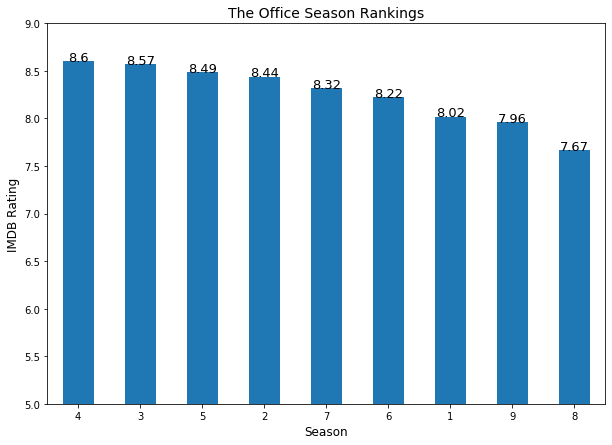

In [6]:
#Create bar chart of season rankings
ax = season_df.plot(kind="bar", figsize=(10,7), rot=0, legend=False, fontsize = 10)

# Create and format value labels
for col in season_df.columns:
    for id, val in enumerate(season_df['IMDB Rating']):
        ax.text(id, val, round(val,2), fontsize=13, ha='center', va='baseline', color = 'black')

# Format chart
plt.title("The Office Season Rankings", fontsize=14)
plt.xlabel("Season", fontsize=12)
plt.ylabel("IMDB Rating", fontsize=12)
plt.ylim(5.0, 9)


# Save image
plt.savefig("../images/season_rankings.png")

plt.show()

## Ranking by Episode

In [7]:
episode_all_df = pd.DataFrame(office_df).sort_values(by='IMDB Rating', ascending=False).round(2)

top_episode_df = (episode_all_df)
top_episode_df.head(15)

Season  Episode                  Title  IMDB Rating  Total Votes  \
187       9       23                 Finale          9.7         7934   
137       7       21       Goodbye, Michael          9.7         5749   
77        5       13          Stress Relief          9.6         5948   
27        2       22           Casino Night          9.3         3644   
186       9       22               A.A.R.M.          9.3         2860   
132       7       16  Threat Level Midnight          9.3         3525   
95        6        5        Niagara: Part 2          9.3         1946   
64        4       14          Goodbye, Toby          9.3         3010   
59        4        9           Dinner Party          9.3         4095   
50        3       23                The Job          9.3         3010   
94        6        4        Niagara: Part 1          9.3         3579   
134       7       18            Garage Sale          9.2         2742   
49        3       22            Beach Games          9.1         2783   
87        5       23                  Broke          9.1         2509   
17        2       12             The Injury          9.0         3282   

        Air Date  
187  16 May 2013  
137  28 Apr 2011  
77    1 Feb 2009  
27   11 May 2006  
186   9 May 2013  
132  17 Feb 2011  
95    8 Oct 2009  
64   15 May 2008  
59   10 Apr 2008  
50   17 May 2007  
94    8 Oct 2009  
134  24 Mar 2011  
49   10 May 2007  
87   23 Apr 2009  
17   12 Jan 2006

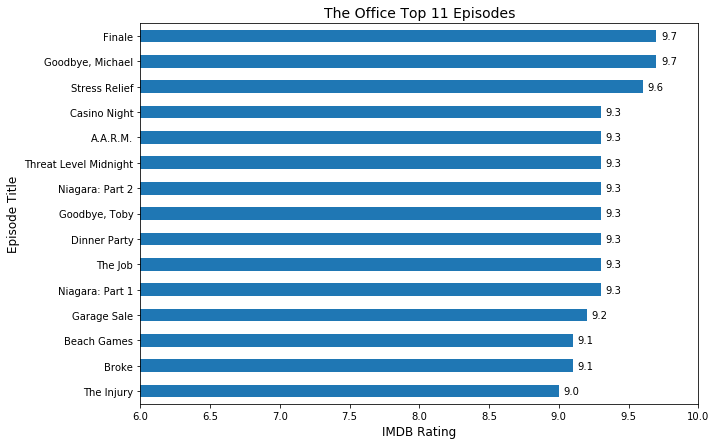

In [8]:
#Create bar chart of season rankings
ax = top_episode_df.iloc[0:15].plot.barh(x='Title', y='IMDB Rating', figsize=(10,7), rot=0, legend=False, fontsize = 10)


# Create and format value labels
# stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.1f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    
# Format chart
plt.title("The Office Top 11 Episodes", fontsize=14)
plt.xlabel("IMDB Rating", fontsize=12)
plt.ylabel("Episode Title", fontsize=12)
plt.xlim(6.0, 10)
ax.invert_yaxis()

# Save image
plt.savefig("../images/episode_rankings.png")

plt.show()

In [9]:
episode_s1_df = pd.DataFrame(s1_ep).sort_values(by='IMDB Rating', ascending=False)

episode_s1_df.head()

Season  Episode          Title  IMDB Rating  Total Votes     Air Date
4       1        5     Basketball          8.4         3179  19 Apr 2005
1       1        2  Diversity Day          8.3         3566  29 Mar 2005
3       1        4   The Alliance          8.1         2886  12 Apr 2005
2       1        3    Health Care          7.9         2983   5 Apr 2005
5       1        6       Hot Girl          7.8         2852  26 Apr 2005

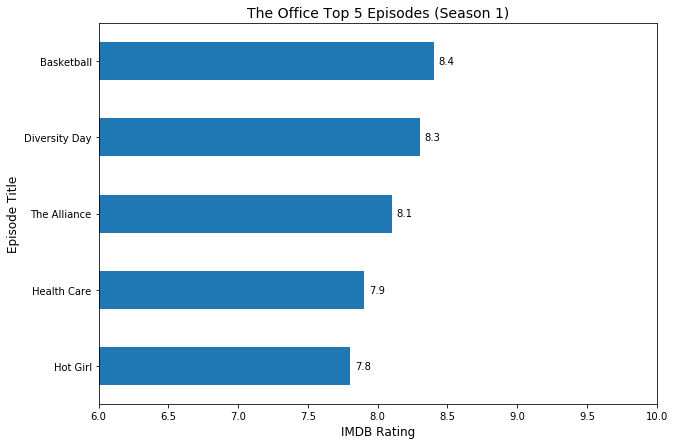

In [10]:
#Create bar chart of season rankings
ax = episode_s1_df.iloc[0:5].plot.barh(x='Title', y='IMDB Rating', figsize=(10,7), rot=0, legend=False, fontsize = 10)


# Create and format value labels
# stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.1f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    
# Format chart
plt.title("The Office Top 5 Episodes (Season 1)", fontsize=14)
plt.xlabel("IMDB Rating", fontsize=12)
plt.ylabel("Episode Title", fontsize=12)
plt.xlim(6.0, 10)
ax.invert_yaxis()

# Save image
plt.savefig("../images/s1_ep_rankings.png")

plt.show()

In [11]:
episode_s2_df = pd.DataFrame(s2_ep).sort_values(by='IMDB Rating', ascending=False)

episode_s2_df.head()

Season  Episode                Title  IMDB Rating  Total Votes  \
21       2       22         Casino Night          9.3         3644   
11       2       12           The Injury          9.0         3282   
9        2       10      Christmas Party          8.8         2755   
0        2        1          The Dundies          8.7         3213   
20       2       21  Conflict Resolution          8.7         2440   

       Air Date  
21  11 May 2006  
11  12 Jan 2006  
9    6 Dec 2005  
0   20 Sep 2005  
20   4 May 2006

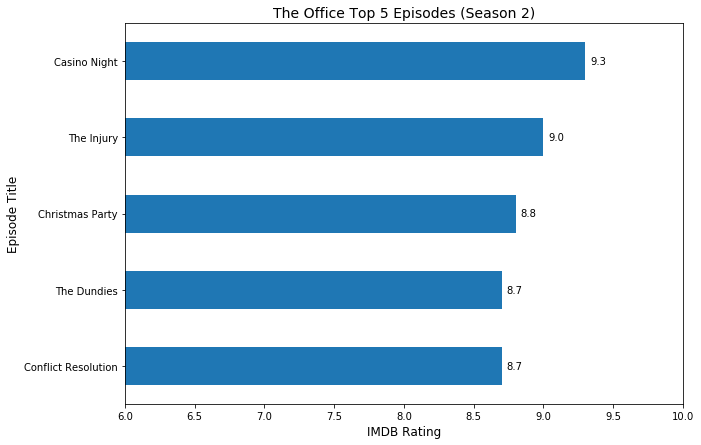

In [12]:
#Create bar chart of season rankings
ax = episode_s2_df.iloc[0:5].plot.barh(x='Title', y='IMDB Rating', figsize=(10,7), rot=0, legend=False, fontsize = 10)


# Create and format value labels
# stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.1f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    
# Format chart
plt.title("The Office Top 5 Episodes (Season 2)", fontsize=14)
plt.xlabel("IMDB Rating", fontsize=12)
plt.ylabel("Episode Title", fontsize=12)
plt.xlim(6.0, 10)
ax.invert_yaxis()

# Save image
plt.savefig("../images/s2_ep_rankings.png")

plt.show()

In [13]:
episode_s3_df = pd.DataFrame(s3_ep).sort_values(by='IMDB Rating', ascending=False)

episode_s3_df.head()

Season  Episode            Title  IMDB Rating  Total Votes     Air Date
22       3       23          The Job          9.3         3010  17 May 2007
21       3       22      Beach Games          9.1         2783  10 May 2007
17       3       18  The Negotiation          8.9         2555   5 Apr 2007
0        3        1   Gay Witch Hunt          8.9         3087  21 Sep 2006
18       3       19  Safety Training          8.8         2424  12 Apr 2007

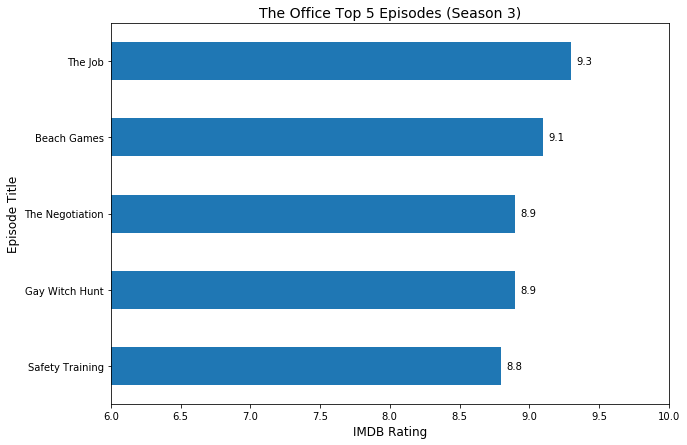

In [14]:
#Create bar chart of season rankings
ax = episode_s3_df.iloc[0:5].plot.barh(x='Title', y='IMDB Rating', figsize=(10,7), rot=0, legend=False, fontsize = 10)


# Create and format value labels
# stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.1f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    
# Format chart
plt.title("The Office Top 5 Episodes (Season 3)", fontsize=14)
plt.xlabel("IMDB Rating", fontsize=12)
plt.ylabel("Episode Title", fontsize=12)
plt.xlim(6.0, 10)
ax.invert_yaxis()

# Save image
plt.savefig("../images/s3_ep_rankings.png")

plt.show()

In [15]:
episode_s4_df = pd.DataFrame(s4_ep).sort_values(by='IMDB Rating', ascending=False)

episode_s4_df.head()

Season  Episode          Title  IMDB Rating  Total Votes     Air Date
8        4        9   Dinner Party          9.3         4095  10 Apr 2008
13       4       14  Goodbye, Toby          9.3         3010  15 May 2008
0        4        1        Fun Run          8.8         2826  27 Sep 2007
4        4        5       Local Ad          8.8         2388  25 Oct 2007
3        4        4          Money          8.7         2341  18 Oct 2007

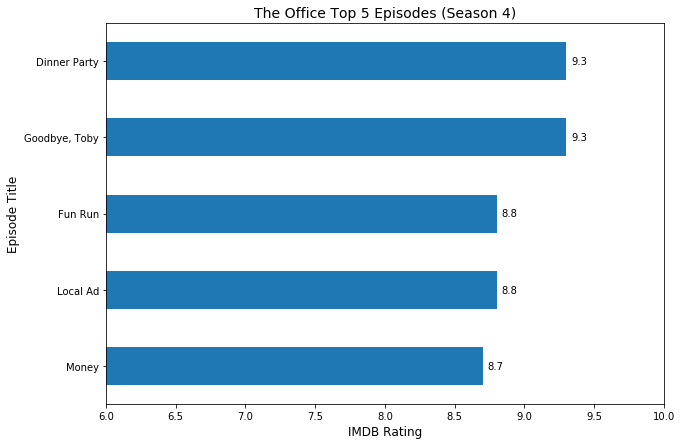

In [16]:
#Create bar chart of season rankings
ax = episode_s4_df.iloc[0:5].plot.barh(x='Title', y='IMDB Rating', figsize=(10,7), rot=0, legend=False, fontsize = 10)


# Create and format value labels
# stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.1f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    
# Format chart
plt.title("The Office Top 5 Episodes (Season 4)", fontsize=14)
plt.xlabel("IMDB Rating", fontsize=12)
plt.ylabel("Episode Title", fontsize=12)
plt.xlim(6.0, 10)
ax.invert_yaxis()

# Save image
plt.savefig("../images/s4_ep_rankings.png")

plt.show()

In [17]:
episode_s5_df = pd.DataFrame(s5_ep).sort_values(by='IMDB Rating', ascending=False)

episode_s5_df.head()

Season  Episode              Title  IMDB Rating  Total Votes     Air Date
12       5       13      Stress Relief          9.6         5948   1 Feb 2009
22       5       23              Broke          9.1         2509  23 Apr 2009
25       5       26     Company Picnic          8.9         2232  14 May 2009
0        5        1        Weight Loss          8.8         2501  25 Sep 2008
21       5       22  Heavy Competition          8.7         1913  16 Apr 2009

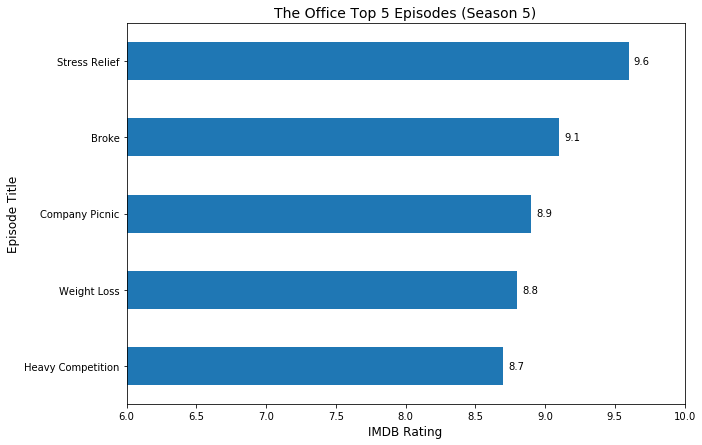

In [18]:
#Create bar chart of season rankings
ax = episode_s5_df.iloc[0:5].plot.barh(x='Title', y='IMDB Rating', figsize=(10,7), rot=0, legend=False, fontsize = 10)


# Create and format value labels
# stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.1f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    
# Format chart
plt.title("The Office Top 5 Episodes (Season 5)", fontsize=14)
plt.xlabel("IMDB Rating", fontsize=12)
plt.ylabel("Episode Title", fontsize=12)
plt.xlim(6.0, 10)
ax.invert_yaxis()

# Save image
plt.savefig("../images/s5_ep_rankings.png")

plt.show()

In [19]:
episode_s6_df = pd.DataFrame(s6_ep).sort_values(by='IMDB Rating', ascending=False)

episode_s6_df.head()

Season  Episode            Title  IMDB Rating  Total Votes     Air Date
3        6        4  Niagara: Part 1          9.3         3579   8 Oct 2009
4        6        5  Niagara: Part 2          9.3         1946   8 Oct 2009
0        6        1           Gossip          8.7         2127  17 Sep 2009
20       6       21       Happy Hour          8.6         1873  25 Mar 2010
6        6        7        The Lover          8.6         1917  22 Oct 2009

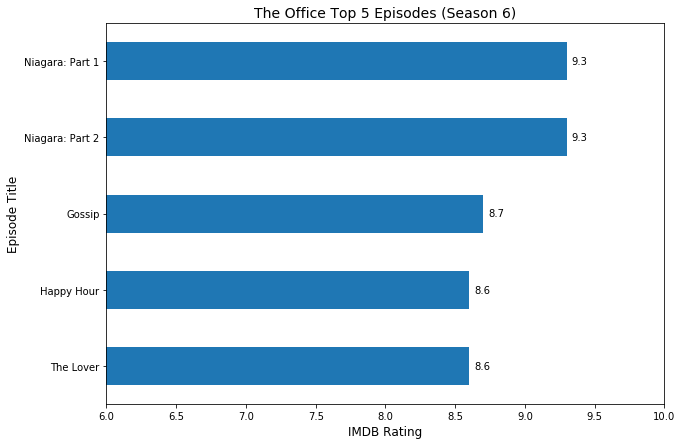

In [20]:
#Create bar chart of season rankings
ax = episode_s6_df.iloc[0:5].plot.barh(x='Title', y='IMDB Rating', figsize=(10,7), rot=0, legend=False, fontsize = 10)


# Create and format value labels
# stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.1f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    
# Format chart
plt.title("The Office Top 5 Episodes (Season 6)", fontsize=14)
plt.xlabel("IMDB Rating", fontsize=12)
plt.ylabel("Episode Title", fontsize=12)
plt.xlim(6.0, 10)
ax.invert_yaxis()

# Save image
plt.savefig("../images/s6_ep_rankings.png")

plt.show()

In [21]:
episode_s7_df = pd.DataFrame(s7_ep).sort_values(by='IMDB Rating', ascending=False)

episode_s7_df.head()

Season  Episode                   Title  IMDB Rating  Total Votes  \
20       7       21        Goodbye, Michael          9.7         5749   
15       7       16   Threat Level Midnight          9.3         3525   
17       7       18             Garage Sale          9.2         2742   
10       7       11        Classy Christmas          8.9         2138   
19       7       20  Michael's Last Dundies          8.9         2182   

       Air Date  
20  28 Apr 2011  
15  17 Feb 2011  
17  24 Mar 2011  
10   9 Dec 2010  
19  21 Apr 2011

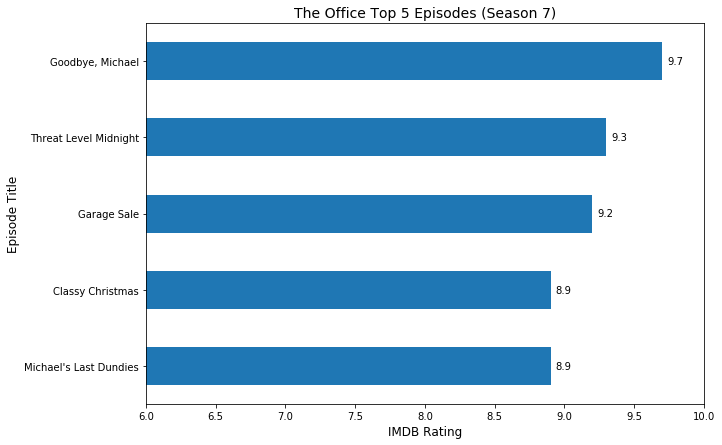

In [22]:
#Create bar chart of season rankings
ax = episode_s7_df.iloc[0:5].plot.barh(x='Title', y='IMDB Rating', figsize=(10,7), rot=0, legend=False, fontsize = 10)


# Create and format value labels
# stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.1f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    
# Format chart
plt.title("The Office Top 5 Episodes (Season 7)", fontsize=14)
plt.xlabel("IMDB Rating", fontsize=12)
plt.ylabel("Episode Title", fontsize=12)
plt.xlim(6.0, 10)
ax.invert_yaxis()

# Save image
plt.savefig("../images/s7_ep_rankings.png")

plt.show()

In [23]:
episode_s8_df = pd.DataFrame(s8_ep).sort_values(by='IMDB Rating', ascending=False)

episode_s8_df.head()

Season  Episode          Title  IMDB Rating  Total Votes     Air Date
0        8        1       The List          8.2         1829  22 Sep 2011
1        8        2  The Incentive          8.2         1668  29 Sep 2011
3        8        4   Garden Party          8.1         1717  13 Oct 2011
15       8       16    After Hours          8.1         1567  23 Feb 2012
11       8       12     Pool Party          8.0         1612  19 Jan 2012

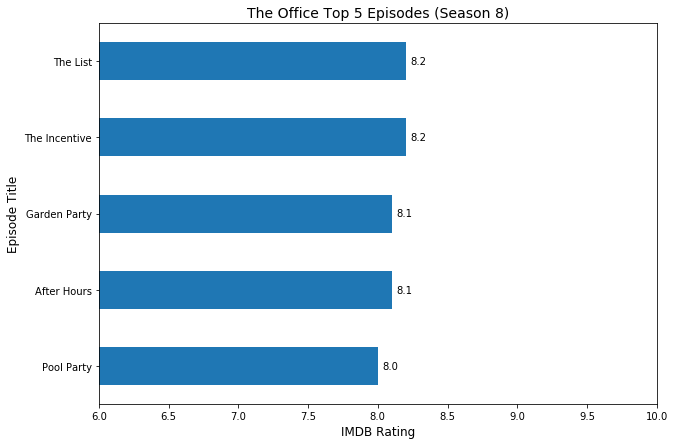

In [24]:
#Create bar chart of season rankings
ax = episode_s8_df.iloc[0:5].plot.barh(x='Title', y='IMDB Rating', figsize=(10,7), rot=0, legend=False, fontsize = 10)


# Create and format value labels
# stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.1f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    
# Format chart
plt.title("The Office Top 5 Episodes (Season 8)", fontsize=14)
plt.xlabel("IMDB Rating", fontsize=12)
plt.ylabel("Episode Title", fontsize=12)
plt.xlim(6.0, 10)
ax.invert_yaxis()

# Save image
plt.savefig("../images/s8_ep_rankings.png")

plt.show()

In [25]:
episode_s9_df = pd.DataFrame(s9_ep).sort_values(by='IMDB Rating', ascending=False)

episode_s9_df.head()

Season  Episode             Title  IMDB Rating  Total Votes     Air Date
22       9       23            Finale          9.7         7934  16 May 2013
21       9       22          A.A.R.M.          9.3         2860   9 May 2013
20       9       21  Livin' the Dream          8.9         2041   2 May 2013
8        9        9  Dwight Christmas          8.4         1634   6 Dec 2012
15       9       16         Moving On          8.2         1572  14 Feb 2013

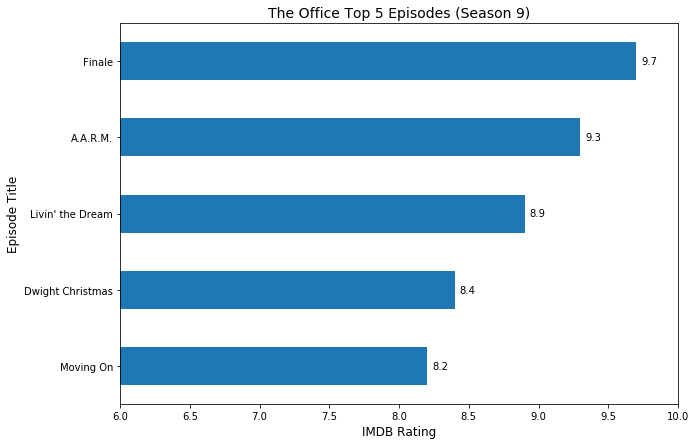

In [26]:
#Create bar chart of season rankings
ax = episode_s9_df.iloc[0:5].plot.barh(x='Title', y='IMDB Rating', figsize=(10,7), rot=0, legend=False, fontsize = 10)


# Create and format value labels
# stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.1f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    
# Format chart
plt.title("The Office Top 5 Episodes (Season 9)", fontsize=14)
plt.xlabel("IMDB Rating", fontsize=12)
plt.ylabel("Episode Title", fontsize=12)
plt.xlim(6.0, 10)
ax.invert_yaxis()

# Save image
plt.savefig("../images/s9_ep_rankings.png")

plt.show()

### Season Box Plots

In [27]:
s1_ep_breakout = (office_df[office_df['Season'] == 1]["IMDB Rating"]).reset_index(drop=True)
s2_ep_breakout = (office_df[office_df['Season'] == 2]["IMDB Rating"]).reset_index(drop=True)
s3_ep_breakout = (office_df[office_df['Season'] == 3]["IMDB Rating"]).reset_index(drop=True)
s4_ep_breakout = (office_df[office_df['Season'] == 4]["IMDB Rating"]).reset_index(drop=True)
s5_ep_breakout = (office_df[office_df['Season'] == 5]["IMDB Rating"]).reset_index(drop=True)
s6_ep_breakout = (office_df[office_df['Season'] == 6]["IMDB Rating"]).reset_index(drop=True)
s7_ep_breakout = (office_df[office_df['Season'] == 7]["IMDB Rating"]).reset_index(drop=True)
s8_ep_breakout = (office_df[office_df['Season'] == 8]["IMDB Rating"]).reset_index(drop=True)
s9_ep_breakout = (office_df[office_df['Season'] == 9]["IMDB Rating"]).reset_index(drop=True)

In [28]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Season 1
quartiles = s1_ep_breakout.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Season One Data")
print(f"-----------------------------")
print(f"Lower quartile: {lowerq}")
print(f"Upper quartile: {upperq}")
print(f"Interquartle range: {iqr}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print()

# Season 2
quartiles = s2_ep_breakout.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Season Two Data")
print(f"-----------------------------")
print(f"Lower quartile: {lowerq}")
print(f"Upper quartile: {upperq}")
print(f"Interquartle range: {iqr}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print()

# Season 3
quartiles = s3_ep_breakout.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Season Three Data")
print(f"-----------------------------")
print(f"Lower quartile: {lowerq}")
print(f"Upper quartile: {upperq}")
print(f"Interquartle range: {iqr}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print()

# Season 4
quartiles = s4_ep_breakout.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Season Four Data")
print(f"-----------------------------")
print(f"Lower quartile: {lowerq}")
print(f"Upper quartile: {upperq}")
print(f"Interquartle range: {iqr}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print()

# Season 5
quartiles = s5_ep_breakout.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Season Five Data")
print(f"-----------------------------")
print(f"Lower quartile: {lowerq}")
print(f"Upper quartile: {upperq}")
print(f"Interquartle range: {iqr}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print()

# Season 6
quartiles = s6_ep_breakout.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Season Six Data")
print(f"-----------------------------")
print(f"Lower quartile: {lowerq}")
print(f"Upper quartile: {upperq}")
print(f"Interquartle range: {iqr}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print()

# Season 7
quartiles = s7_ep_breakout.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Season Seven Data")
print(f"-----------------------------")
print(f"Lower quartile: {lowerq}")
print(f"Upper quartile: {upperq}")
print(f"Interquartle range: {iqr}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print()

# Season 8
quartiles = s8_ep_breakout.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Season Eight Data")
print(f"-----------------------------")
print(f"Lower quartile: {lowerq}")
print(f"Upper quartile: {upperq}")
print(f"Interquartle range: {iqr}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print()

# Season 9
quartiles = s9_ep_breakout.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Season Nine Data")
print(f"-----------------------------")
print(f"Lower quartile: {lowerq}")
print(f"Upper quartile: {upperq}")
print(f"Interquartle range: {iqr}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print()

Season One Data
-----------------------------
Lower quartile: 7.824999999999999
Upper quartile: 8.25
Interquartle range: 0.4250000000000007
Values below 7.187499999999998 could be outliers.
Values above 8.887500000000001 could be outliers.

Season Two Data
-----------------------------
Lower quartile: 8.2
Upper quartile: 8.6
Interquartle range: 0.40000000000000036
Values below 7.599999999999999 could be outliers.
Values above 9.2 could be outliers.

Season Three Data
-----------------------------
Lower quartile: 8.25
Upper quartile: 8.8
Interquartle range: 0.5500000000000007
Values below 7.424999999999999 could be outliers.
Values above 9.625000000000002 could be outliers.

Season Four Data
-----------------------------
Lower quartile: 8.4
Upper quartile: 8.775
Interquartle range: 0.375
Values below 7.8375 could be outliers.
Values above 9.3375 could be outliers.

Season Five Data
-----------------------------
Lower quartile: 8.2
Upper quartile: 8.7
Interquartle range: 0.5
Values below

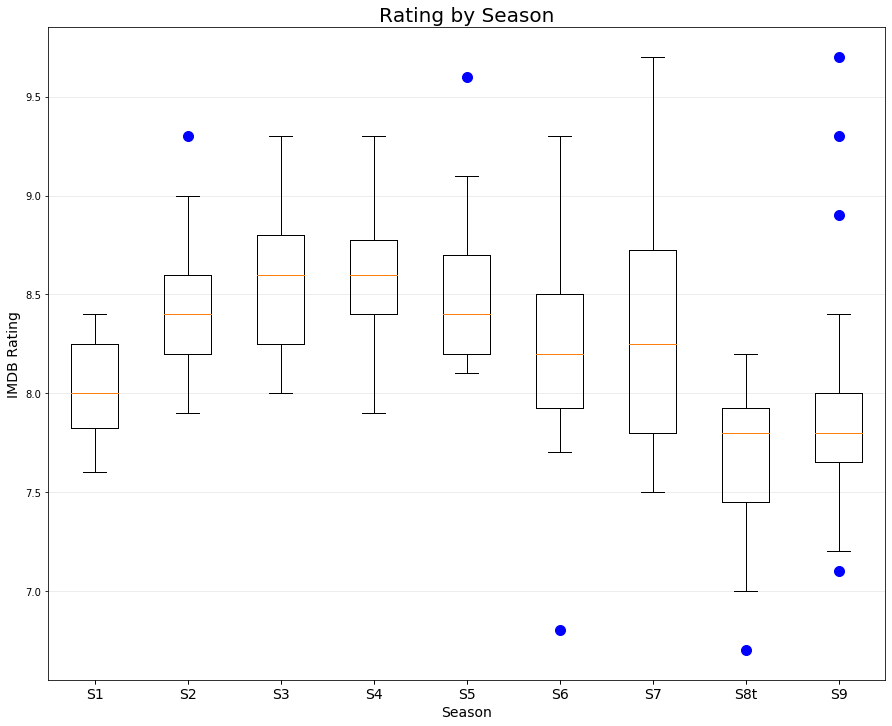

In [29]:
# Generate a box plot of the final ratings per season

boxplot_values = {'S1': s1_ep_breakout, 'S2': s2_ep_breakout, 'S3': s3_ep_breakout, 'S4': s4_ep_breakout,
                 'S5': s5_ep_breakout, 'S6': s6_ep_breakout, 'S7': s7_ep_breakout, 'S8t': s8_ep_breakout,
                 'S9': s9_ep_breakout}

data = [s1_ep_breakout, s2_ep_breakout, s3_ep_breakout, s4_ep_breakout, s5_ep_breakout, s6_ep_breakout, s7_ep_breakout,
       s8_ep_breakout, s9_ep_breakout]


fig, ax = plt.subplots(figsize=(15,12))
ax.boxplot(boxplot_values.values(), notch=0)

ax.set_title('Rating by Season', fontsize = 20)
ax.set_ylabel('IMDB Rating', fontsize = 14)
ax.set_xlabel('Season', fontsize = 14)

# Format the boxplot
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
flierprops = dict(marker='o', markerfacecolor='b', markersize=10, linestyle='none', markeredgecolor='blue')
plt.boxplot(data, flierprops=flierprops)
ax.set_xticklabels(boxplot_values.keys(), fontsize = 14)


# Save image
plt.savefig("../images/rating_by_season.png")

plt.show()

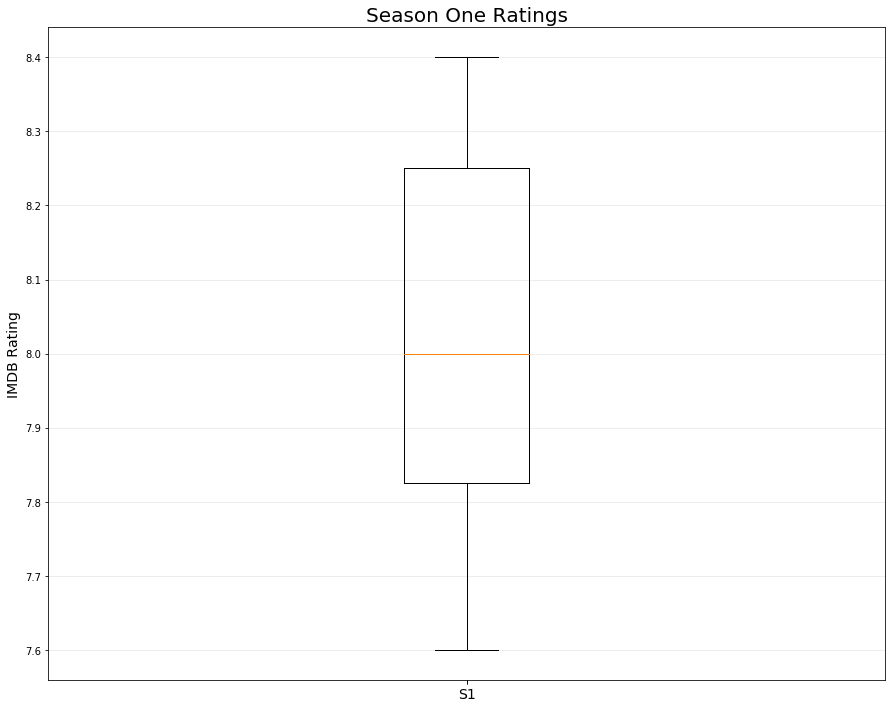

In [30]:
# Generate a box plot of Season One

boxplot_values = {'S1': s1_ep_breakout}
data = [s1_ep_breakout]


fig, ax = plt.subplots(figsize=(15,12))
ax.boxplot(boxplot_values.values(), notch=0)

ax.set_title('Season One Ratings', fontsize = 20)
ax.set_ylabel('IMDB Rating', fontsize = 14)


# Format the boxplot
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
flierprops = dict(marker='o', markerfacecolor='b', markersize=10, linestyle='none', markeredgecolor='blue')
plt.boxplot(data, flierprops=flierprops)
ax.set_xticklabels(boxplot_values.keys(), fontsize = 14)


# Save image
plt.savefig("../images/boxplot_s1.png")

plt.show()

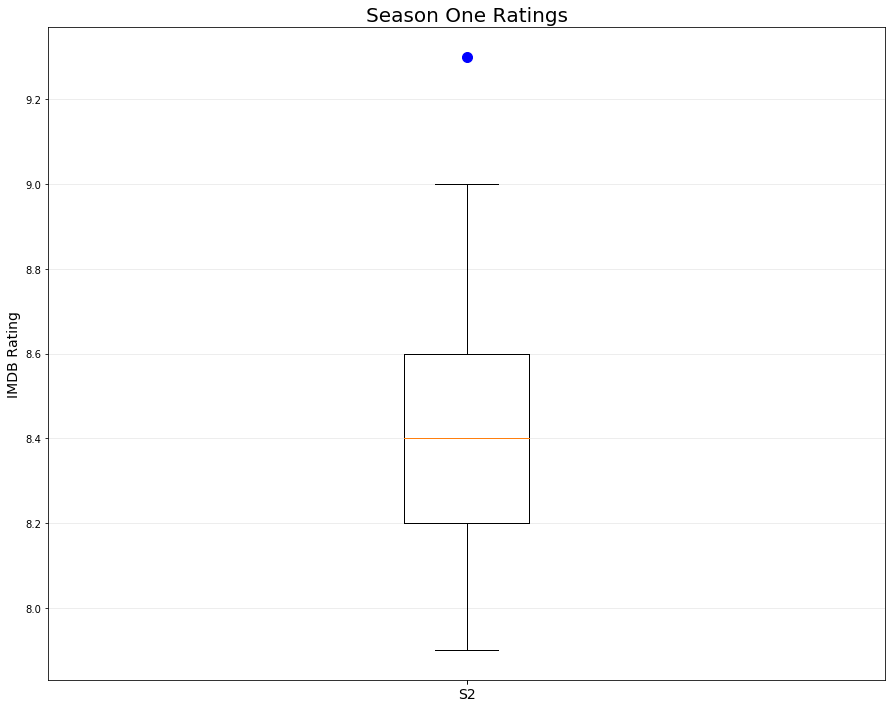

In [31]:
# Generate a box plot of Season Two

boxplot_values = {'S2': s2_ep_breakout}
data = [s2_ep_breakout]


fig, ax = plt.subplots(figsize=(15,12))
ax.boxplot(boxplot_values.values(), notch=0)

ax.set_title('Season One Ratings', fontsize = 20)
ax.set_ylabel('IMDB Rating', fontsize = 14)


# Format the boxplot
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
flierprops = dict(marker='o', markerfacecolor='b', markersize=10, linestyle='none', markeredgecolor='blue')
plt.boxplot(data, flierprops=flierprops)
ax.set_xticklabels(boxplot_values.keys(), fontsize = 14)


# Save image
plt.savefig("../images/boxplot_s2.png")

plt.show()

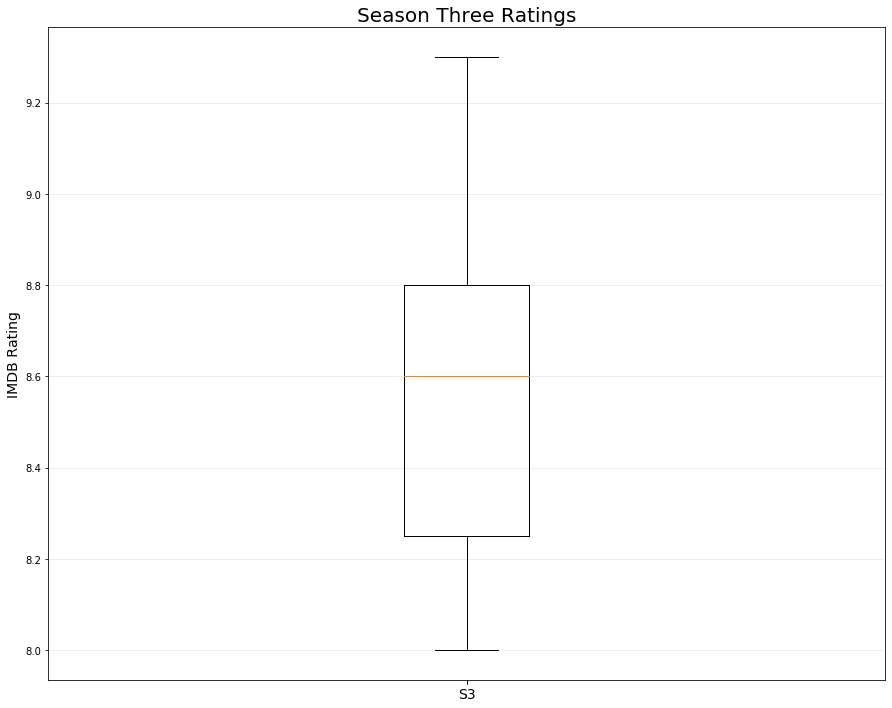

In [32]:
# Generate a box plot of Season Three

boxplot_values = {'S3': s3_ep_breakout}
data = [s3_ep_breakout]


fig, ax = plt.subplots(figsize=(15,12))
ax.boxplot(boxplot_values.values(), notch=0)

ax.set_title('Season Three Ratings', fontsize = 20)
ax.set_ylabel('IMDB Rating', fontsize = 14)


# Format the boxplot
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
flierprops = dict(marker='o', markerfacecolor='b', markersize=10, linestyle='none', markeredgecolor='blue')
plt.boxplot(data, flierprops=flierprops)
ax.set_xticklabels(boxplot_values.keys(), fontsize = 14)


# Save image
plt.savefig("../images/boxplot_s3.png")

plt.show()

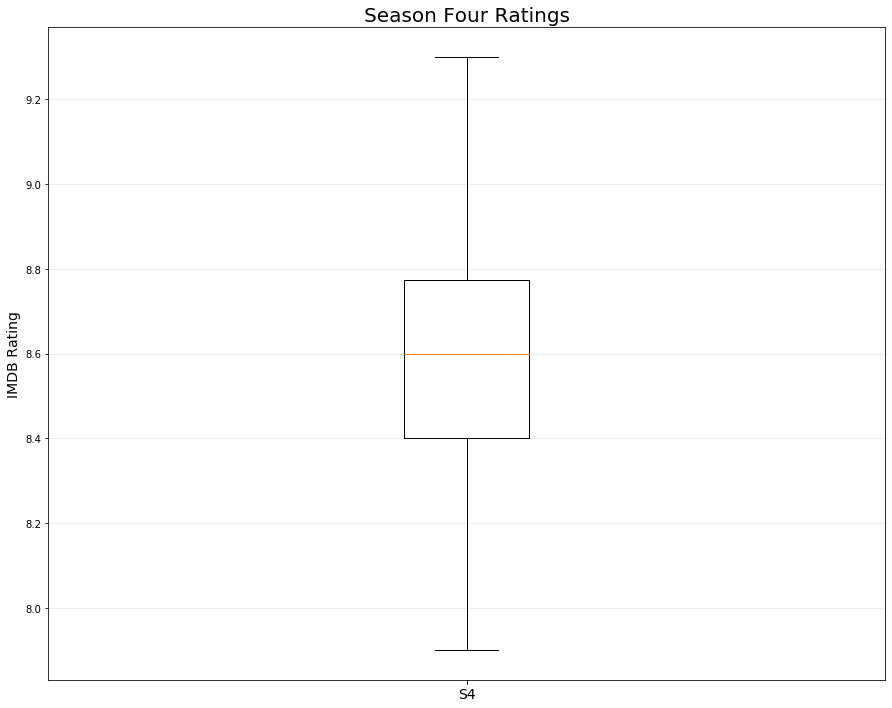

In [33]:
# Generate a box plot of Season Four

boxplot_values = {'S4': s4_ep_breakout}
data = [s4_ep_breakout]


fig, ax = plt.subplots(figsize=(15,12))
ax.boxplot(boxplot_values.values(), notch=0)

ax.set_title('Season Four Ratings', fontsize = 20)
ax.set_ylabel('IMDB Rating', fontsize = 14)


# Format the boxplot
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
flierprops = dict(marker='o', markerfacecolor='b', markersize=10, linestyle='none', markeredgecolor='blue')
plt.boxplot(data, flierprops=flierprops)
ax.set_xticklabels(boxplot_values.keys(), fontsize = 14)


# Save image
plt.savefig("../images/boxplot_s4.png")

plt.show()

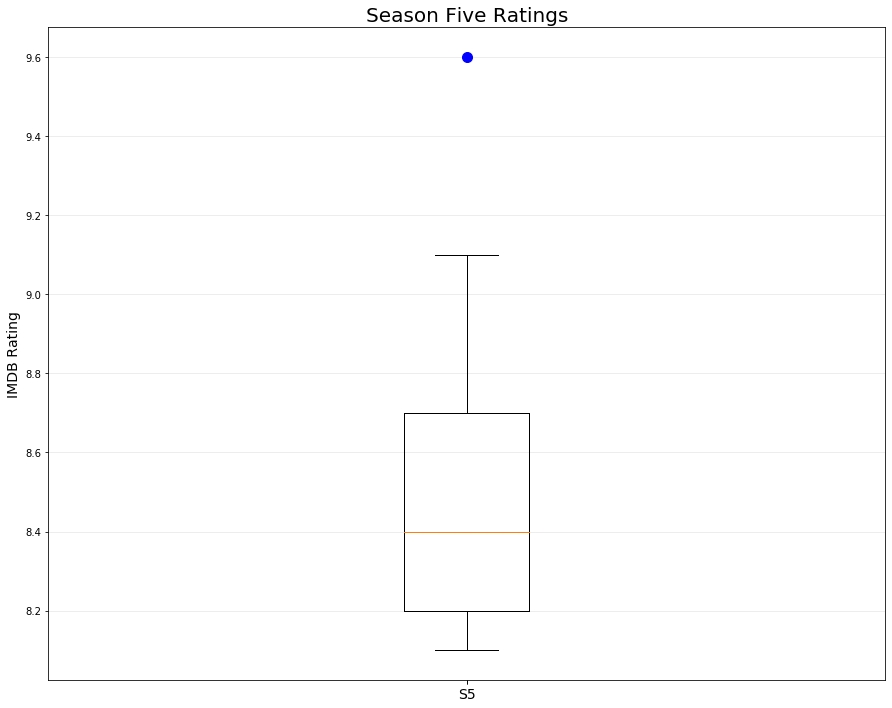

In [34]:
# Generate a box plot of Season Five

boxplot_values = {'S5': s5_ep_breakout}
data = [s5_ep_breakout]


fig, ax = plt.subplots(figsize=(15,12))
ax.boxplot(boxplot_values.values(), notch=0)

ax.set_title('Season Five Ratings', fontsize = 20)
ax.set_ylabel('IMDB Rating', fontsize = 14)


# Format the boxplot
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
flierprops = dict(marker='o', markerfacecolor='b', markersize=10, linestyle='none', markeredgecolor='blue')
plt.boxplot(data, flierprops=flierprops)
ax.set_xticklabels(boxplot_values.keys(), fontsize = 14)


# Save image
plt.savefig("../images/boxplot_s5.png")

plt.show()

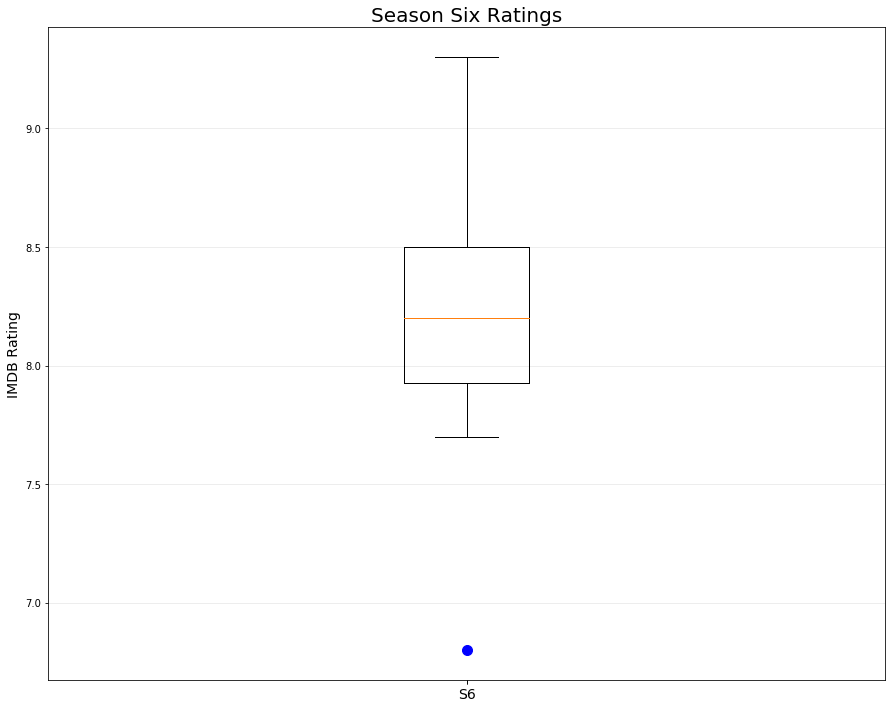

In [35]:
# Generate a box plot of Season Six

boxplot_values = {'S6': s6_ep_breakout}
data = [s6_ep_breakout]


fig, ax = plt.subplots(figsize=(15,12))
ax.boxplot(boxplot_values.values(), notch=0)

ax.set_title('Season Six Ratings', fontsize = 20)
ax.set_ylabel('IMDB Rating', fontsize = 14)


# Format the boxplot
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
flierprops = dict(marker='o', markerfacecolor='b', markersize=10, linestyle='none', markeredgecolor='blue')
plt.boxplot(data, flierprops=flierprops)
ax.set_xticklabels(boxplot_values.keys(), fontsize = 14)


# Save image
plt.savefig("../images/boxplot_s6.png")

plt.show()

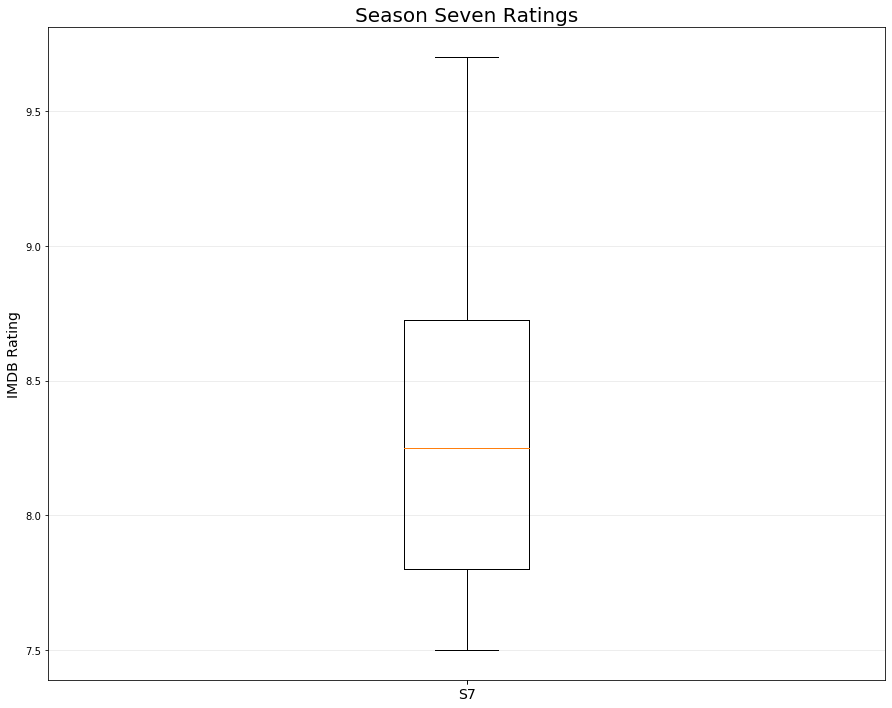

In [36]:
# Generate a box plot of Season Severn

boxplot_values = {'S7': s7_ep_breakout}
data = [s7_ep_breakout]


fig, ax = plt.subplots(figsize=(15,12))
ax.boxplot(boxplot_values.values(), notch=0)

ax.set_title('Season Seven Ratings', fontsize = 20)
ax.set_ylabel('IMDB Rating', fontsize = 14)


# Format the boxplot
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
flierprops = dict(marker='o', markerfacecolor='b', markersize=10, linestyle='none', markeredgecolor='blue')
plt.boxplot(data, flierprops=flierprops)
ax.set_xticklabels(boxplot_values.keys(), fontsize = 14)


# Save image
plt.savefig("../images/boxplot_s7.png")

plt.show()

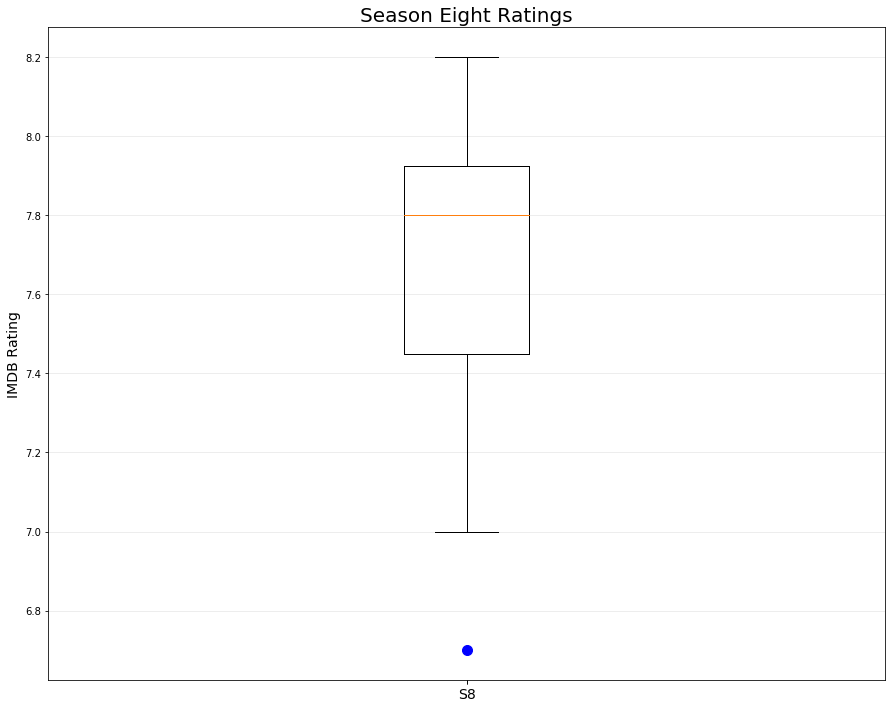

In [37]:
# Generate a box plot of Season Eight

boxplot_values = {'S8': s8_ep_breakout}
data = [s8_ep_breakout]


fig, ax = plt.subplots(figsize=(15,12))
ax.boxplot(boxplot_values.values(), notch=0)

ax.set_title('Season Eight Ratings', fontsize = 20)
ax.set_ylabel('IMDB Rating', fontsize = 14)


# Format the boxplot
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
flierprops = dict(marker='o', markerfacecolor='b', markersize=10, linestyle='none', markeredgecolor='blue')
plt.boxplot(data, flierprops=flierprops)
ax.set_xticklabels(boxplot_values.keys(), fontsize = 14)


# Save image
plt.savefig("../images/boxplot_s8.png")

plt.show()

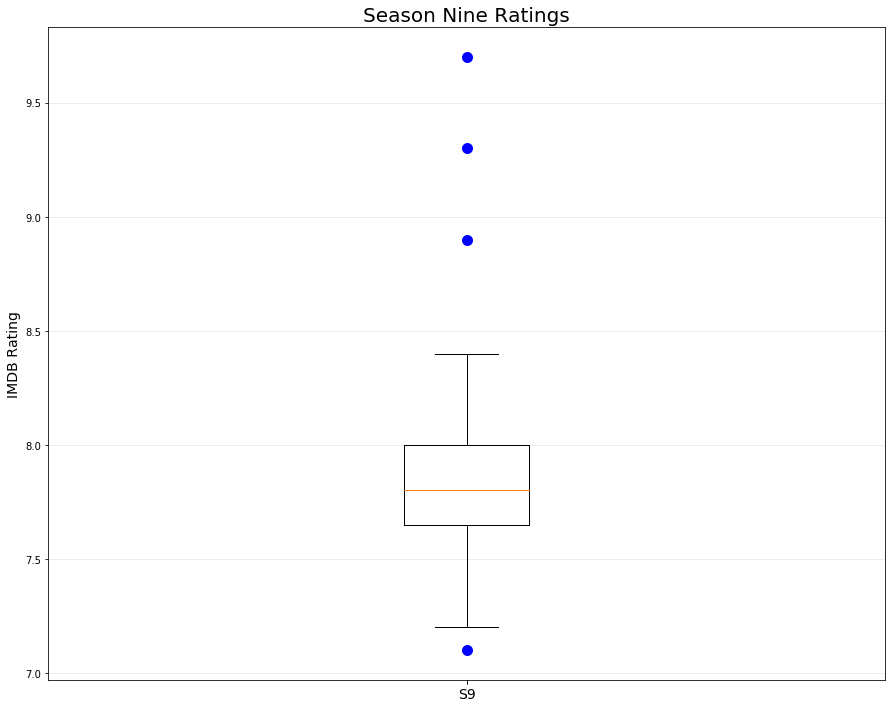

In [38]:
# Generate a box plot of Season Nine

boxplot_values = {'S9': s9_ep_breakout}
data = [s9_ep_breakout]


fig, ax = plt.subplots(figsize=(15,12))
ax.boxplot(boxplot_values.values(), notch=0)

ax.set_title('Season Nine Ratings', fontsize = 20)
ax.set_ylabel('IMDB Rating', fontsize = 14)


# Format the boxplot
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
flierprops = dict(marker='o', markerfacecolor='b', markersize=10, linestyle='none', markeredgecolor='blue')
plt.boxplot(data, flierprops=flierprops)
ax.set_xticklabels(boxplot_values.keys(), fontsize = 14)


# Save image
plt.savefig("../images/boxplot_s9.png")

plt.show()

## Number of Episodes per Season

In [39]:
# Count of the number of episodes by seasson
eps_per_season = office_df.groupby(["Season"]).count()["Episode"]

per_season_df = pd.DataFrame(eps_per_season)
per_season_df

Episode
Season         
1             6
2            22
3            23
4            14
5            26
6            26
7            24
8            24
9            23

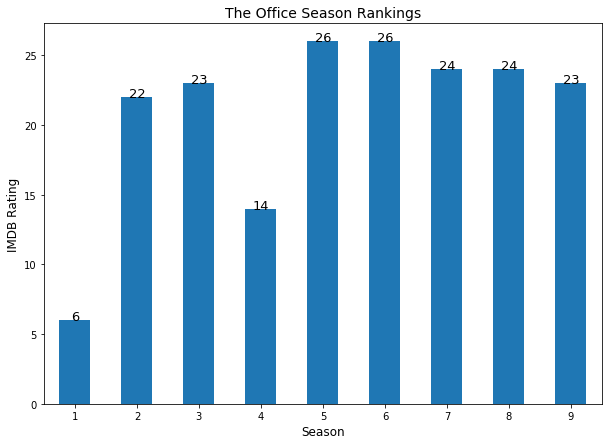

In [40]:
#Create bar chart of the number of episodes per season
ax = per_season_df.plot(kind="bar", figsize=(10,7), rot=0, legend=False, fontsize = 10)

# Create and format value labels
for col in per_season_df.columns:
    for id, val in enumerate(per_season_df['Episode']):
        ax.text(id, val, round(val,2), fontsize=13, ha='center', va='baseline', color = 'black')
                  
         
        

# Format chart
plt.title("The Office Season Rankings", fontsize=14)
plt.xlabel("Season", fontsize=12)
plt.ylabel("IMDB Rating", fontsize=12)


# Save image
plt.savefig("../images/eps_per_season.png")

plt.show()

## Characters With Most Lines

In [41]:
lines_all = lines_df.groupby(["speaker"]).count()["line"]

lines_all_df= pd.DataFrame(lines_all).sort_values(by="line", ascending=False)
lines_all_df.head(10)

line
speaker       
Michael  10799
Dwight    6759
Jim       6226
Pam       4978
Andy      3699
Angela    1536
Kevin     1535
Erin      1413
Oscar     1336
Ryan      1182

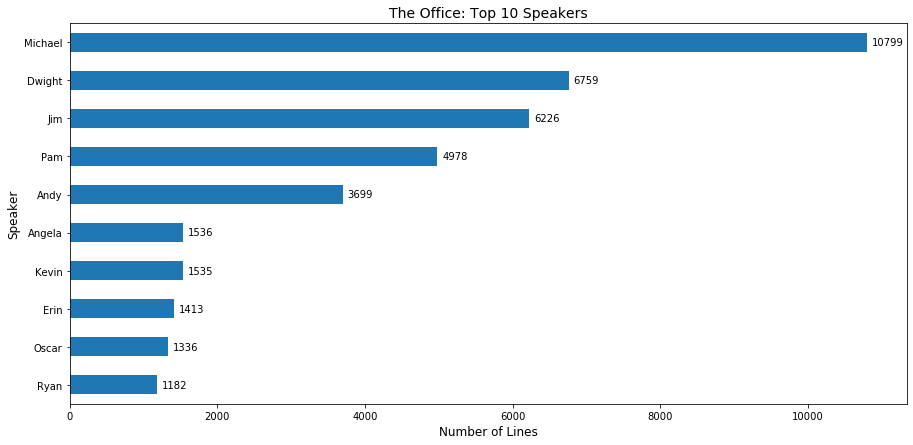

In [42]:
#Create bar chart of season rankings
ax = lines_all_df.iloc[0:10].plot.barh(figsize=(15,7), rot=0, legend=False, fontsize = 10)


# Create and format value labels
# stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.0f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    
# Format chart
plt.title("The Office: Top 10 Speakers", fontsize=14)
plt.xlabel("Number of Lines", fontsize=12)
plt.ylabel("Speaker", fontsize=12)

ax.invert_yaxis()

# Save image
plt.savefig("../images/top_speakers.png")

plt.show()

## Number of lines per season

In [43]:
s1_lines_breakout = (lines_df[lines_df['season'] == 1]).reset_index(drop=True)
s2_lines_breakout = (lines_df[lines_df['season'] == 2]).reset_index(drop=True)
s3_lines_breakout = (lines_df[lines_df['season'] == 3]).reset_index(drop=True)
s4_lines_breakout = (lines_df[lines_df['season'] == 4]).reset_index(drop=True)
s5_lines_breakout = (lines_df[lines_df['season'] == 5]).reset_index(drop=True)
s6_lines_breakout = (lines_df[lines_df['season'] == 6]).reset_index(drop=True)
s7_lines_breakout = (lines_df[lines_df['season'] == 7]).reset_index(drop=True)
s8_lines_breakout = (lines_df[lines_df['season'] == 8]).reset_index(drop=True)
s9_lines_breakout = (lines_df[lines_df['season'] == 9]).reset_index(drop=True)


### Season 1

In [44]:
s1_lines = s1_lines_breakout.groupby(["speaker"]).count()["line"]

s1_lines_df= pd.DataFrame(s1_lines).sort_values(by="line", ascending=False)
s1_lines_df.head(10)

line
speaker        
Michael     490
Jim         228
Dwight      208
Pam         162
Katy         58
Oscar        42
Jan          38
Ryan         37
Mr. Brown    36
Roy          34

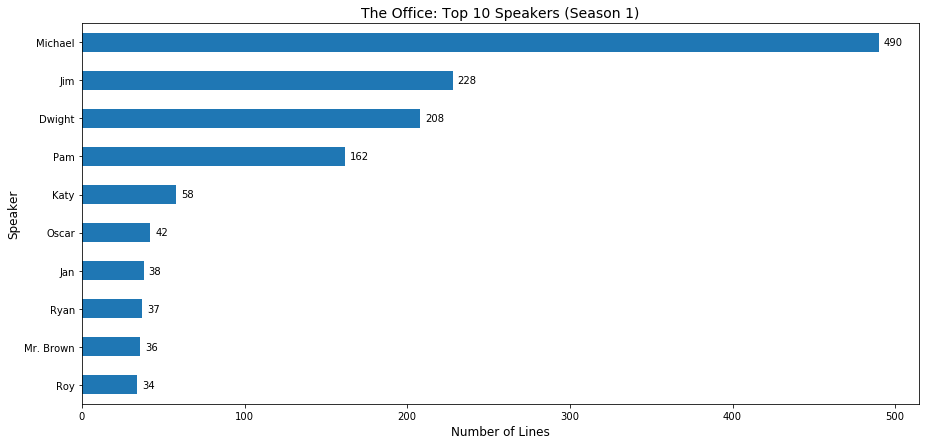

In [45]:
#Create bar chart of season rankings
ax = s1_lines_df.iloc[0:10].plot.barh(figsize=(15,7), rot=0, legend=False, fontsize = 10)


# Create and format value labels
# stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.0f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    
# Format chart
plt.title("The Office: Top 10 Speakers (Season 1)", fontsize=14)
plt.xlabel("Number of Lines", fontsize=12)
plt.ylabel("Speaker", fontsize=12)

ax.invert_yaxis()

# Save image
plt.savefig("../images/s1_speakers.png")

plt.show()

## Season 2

In [46]:
s2_lines = s2_lines_breakout.groupby(["speaker"]).count()["line"]

s2_lines_df= pd.DataFrame(s2_lines).sort_values(by="line", ascending=False)
s2_lines_df.head(10)

line
speaker      
Michael  1837
Dwight    815
Jim       744
Pam       611
Jan       234
Ryan      163
Angela    131
Kevin     117
Toby      103
Oscar      92

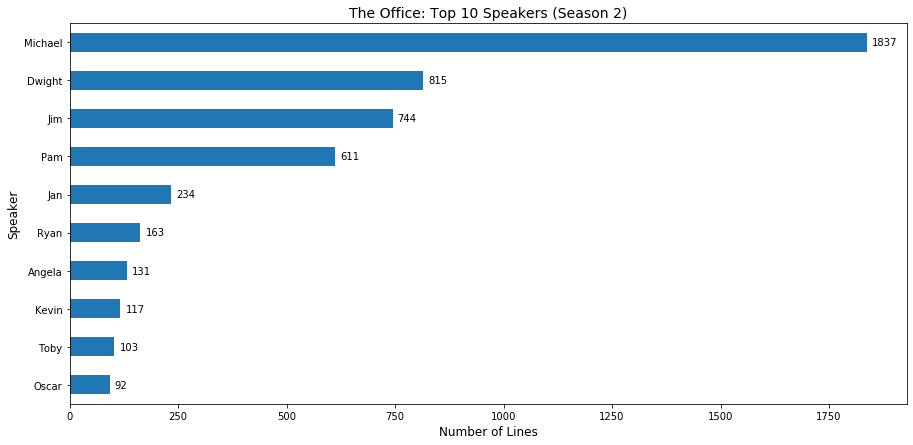

In [47]:
#Create bar chart of season rankings
ax = s2_lines_df.iloc[0:10].plot.barh(figsize=(15,7), rot=0, legend=False, fontsize = 10)


# Create and format value labels
# stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.0f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    
# Format chart
plt.title("The Office: Top 10 Speakers (Season 2)", fontsize=14)
plt.xlabel("Number of Lines", fontsize=12)
plt.ylabel("Speaker", fontsize=12)

ax.invert_yaxis()

# Save image
plt.savefig("../images/s2_speakers.png")

plt.show()

### Season 3

In [48]:
s3_lines = s3_lines_breakout.groupby(["speaker"]).count()["line"]

s3_lines_df= pd.DataFrame(s3_lines).sort_values(by="line", ascending=False)
s3_lines_df.head(10)

line
speaker      
Michael  1702
Dwight    808
Jim       680
Pam       593
Andy      300
Karen     275
Jan       255
Angela    196
Kevin     161
Ryan      140

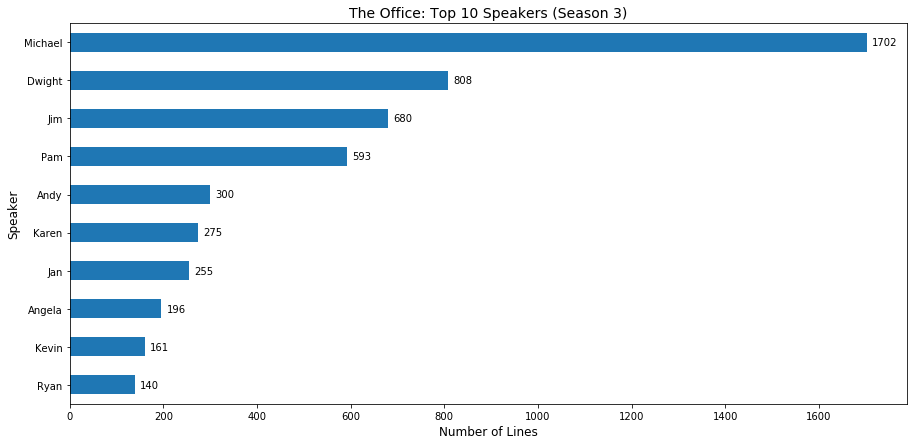

In [49]:
#Create bar chart of season rankings
ax = s3_lines_df.iloc[0:10].plot.barh(figsize=(15,7), rot=0, legend=False, fontsize = 10)


# Create and format value labels
# stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.0f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    
# Format chart
plt.title("The Office: Top 10 Speakers (Season 3)", fontsize=14)
plt.xlabel("Number of Lines", fontsize=12)
plt.ylabel("Speaker", fontsize=12)

ax.invert_yaxis()

# Save image
plt.savefig("../images/s3_speakers.png")

plt.show()

### Season 4

In [50]:
s4_lines = s4_lines_breakout.groupby(["speaker"]).count()["line"]

s4_lines_df= pd.DataFrame(s4_lines).sort_values(by="line", ascending=False)
s4_lines_df.head(10)

line
speaker      
Michael  1378
Jim       574
Dwight    474
Pam       437
Ryan      201
Andy      184
Jan       184
Angela    167
Kevin     125
Toby      111

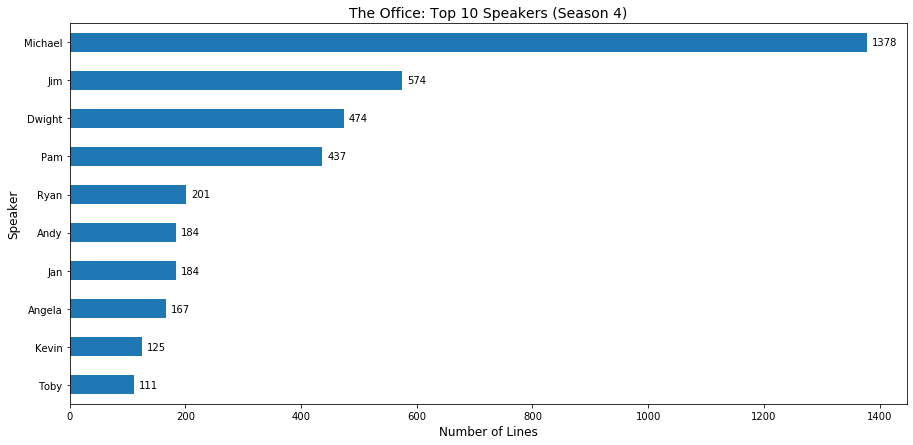

In [51]:
#Create bar chart of season rankings
ax = s4_lines_df.iloc[0:10].plot.barh(figsize=(15,7), rot=0, legend=False, fontsize = 10)


# Create and format value labels
# stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.0f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    
# Format chart
plt.title("The Office: Top 10 Speakers (Season 4)", fontsize=14)
plt.xlabel("Number of Lines", fontsize=12)
plt.ylabel("Speaker", fontsize=12)

ax.invert_yaxis()

# Save image
plt.savefig("../images/s4_speakers.png")

plt.show()

### Season 5

In [52]:
s5_lines = s5_lines_breakout.groupby(["speaker"]).count()["line"]

s5_lines_df= pd.DataFrame(s5_lines).sort_values(by="line", ascending=False)
s5_lines_df.head(10)

line
speaker      
Michael  2063
Dwight   1026
Jim       835
Pam       696
Andy      477
Charles   222
Holly     222
Angela    206
Oscar     195
Phyllis   169

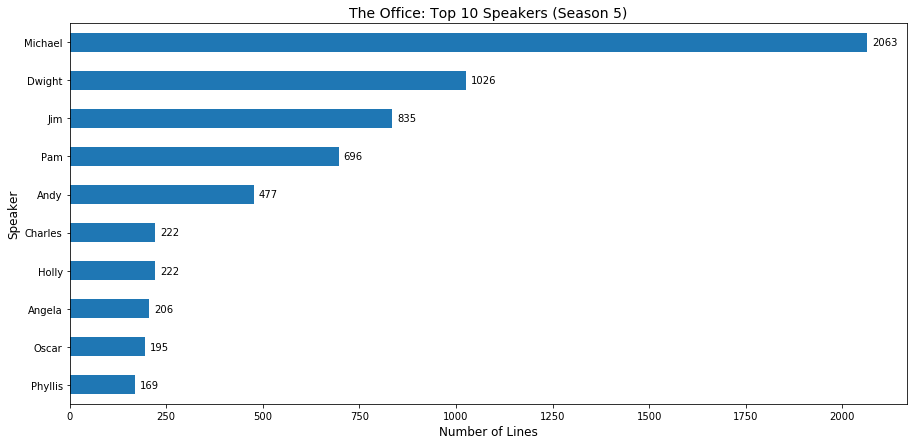

In [53]:
#Create bar chart of season rankings
ax = s5_lines_df.iloc[0:10].plot.barh(figsize=(15,7), rot=0, legend=False, fontsize = 10)


# Create and format value labels
# stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.0f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    
# Format chart
plt.title("The Office: Top 10 Speakers (Season 5)", fontsize=14)
plt.xlabel("Number of Lines", fontsize=12)
plt.ylabel("Speaker", fontsize=12)

ax.invert_yaxis()

# Save image
plt.savefig("../images/s5_speakers.png")

plt.show()

### Season 6

In [54]:
s6_lines = s6_lines_breakout.groupby(["speaker"]).count()["line"]

s6_lines_df= pd.DataFrame(s6_lines).sort_values(by="line", ascending=False)
s6_lines_df.head(10)

line
speaker      
Michael  1901
Jim       889
Dwight    777
Pam       674
Andy      501
Erin      279
Kevin     220
Oscar     156
Jo        138
Phyllis   132

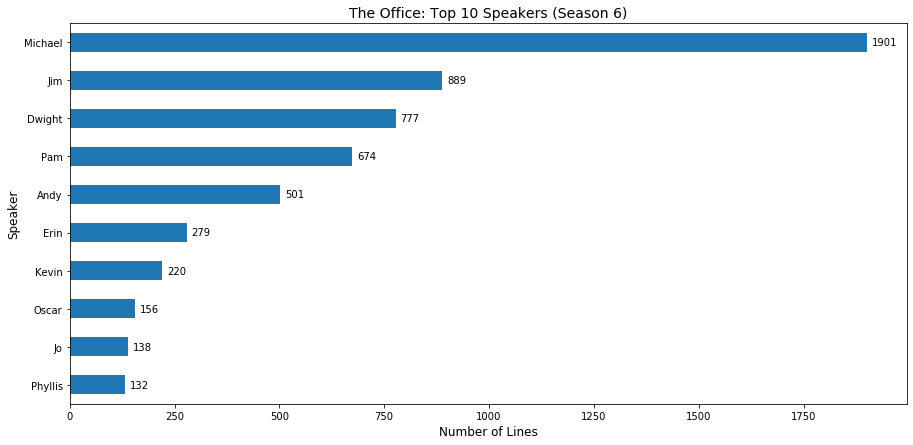

In [55]:
#Create bar chart of season rankings
ax = s6_lines_df.iloc[0:10].plot.barh(figsize=(15,7), rot=0, legend=False, fontsize = 10)


# Create and format value labels
# stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.0f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    
# Format chart
plt.title("The Office: Top 10 Speakers (Season 6)", fontsize=14)
plt.xlabel("Number of Lines", fontsize=12)
plt.ylabel("Speaker", fontsize=12)

ax.invert_yaxis()

# Save image
plt.savefig("../images/s6_speakers.png")

plt.show()

### Season 7

In [56]:
s7_lines = s7_lines_breakout.groupby(["speaker"]).count()["line"]

s7_lines_df= pd.DataFrame(s7_lines).sort_values(by="line", ascending=False)
s7_lines_df.head(10)

line
speaker      
Michael  1426
Dwight    694
Jim       677
Pam       618
Andy      551
Erin      308
Holly     265
Kevin     240
Darryl    226
Gabe      210

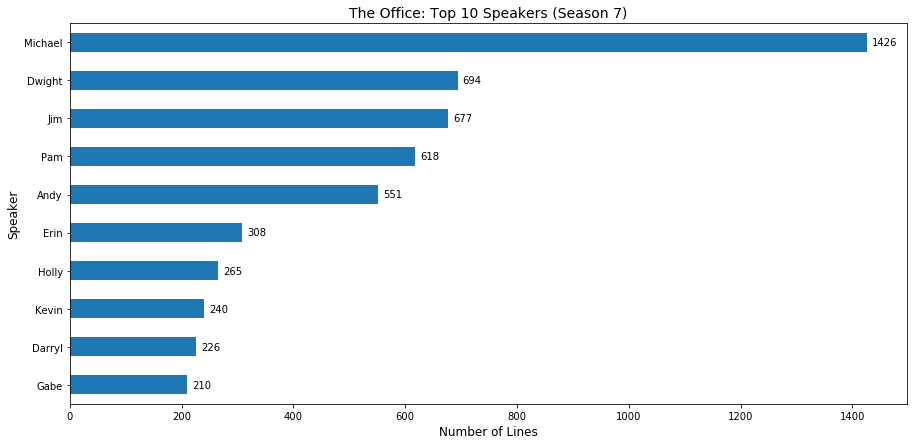

In [57]:
#Create bar chart of season rankings
ax = s7_lines_df.iloc[0:10].plot.barh(figsize=(15,7), rot=0, legend=False, fontsize = 10)


# Create and format value labels
# stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.0f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    
# Format chart
plt.title("The Office: Top 10 Speakers (Season 7)", fontsize=14)
plt.xlabel("Number of Lines", fontsize=12)
plt.ylabel("Speaker", fontsize=12)

ax.invert_yaxis()

# Save image
plt.savefig("../images/s7_speakers.png")

plt.show()

### Season 8

In [58]:
s8_lines = s8_lines_breakout.groupby(["speaker"]).count()["line"]

s8_lines_df= pd.DataFrame(s8_lines).sort_values(by="line", ascending=False)
s8_lines_df.head(10)

line
speaker      
Andy     1049
Dwight    897
Jim       803
Pam       456
Erin      396
Robert    380
Darryl    298
Nellie    232
Kevin     228
Oscar     222

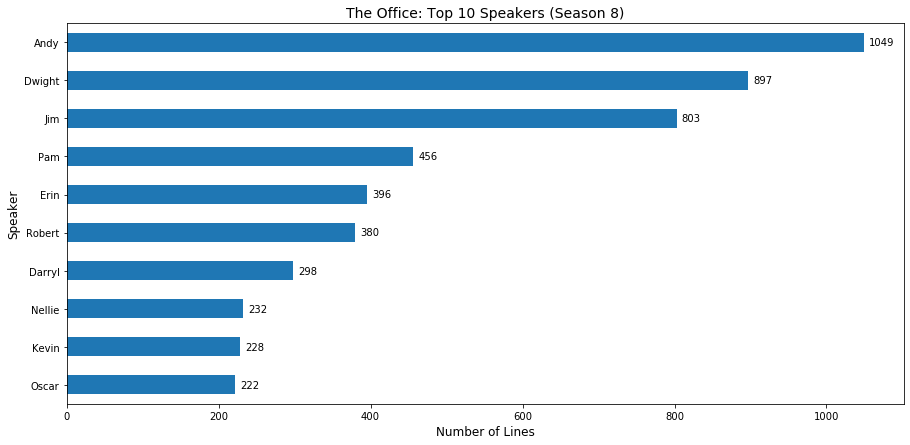

In [59]:
#Create bar chart of season rankings
ax = s8_lines_df.iloc[0:10].plot.barh(figsize=(15,7), rot=0, legend=False, fontsize = 10)


# Create and format value labels
# stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.0f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    
# Format chart
plt.title("The Office: Top 10 Speakers (Season 8)", fontsize=14)
plt.xlabel("Number of Lines", fontsize=12)
plt.ylabel("Speaker", fontsize=12)

ax.invert_yaxis()

# Save image
plt.savefig("../images/s8_speakers.png")

plt.show()

### Season 9

In [60]:
s9_lines = s9_lines_breakout.groupby(["speaker"]).count()["line"]

s9_lines_df= pd.DataFrame(s9_lines).sort_values(by="line", ascending=False)
s9_lines_df.head(10)

line
speaker      
Dwight   1060
Jim       796
Pam       731
Andy      637
Angela    379
Erin      377
Oscar     294
Nellie    286
Darryl    275
Kevin     265

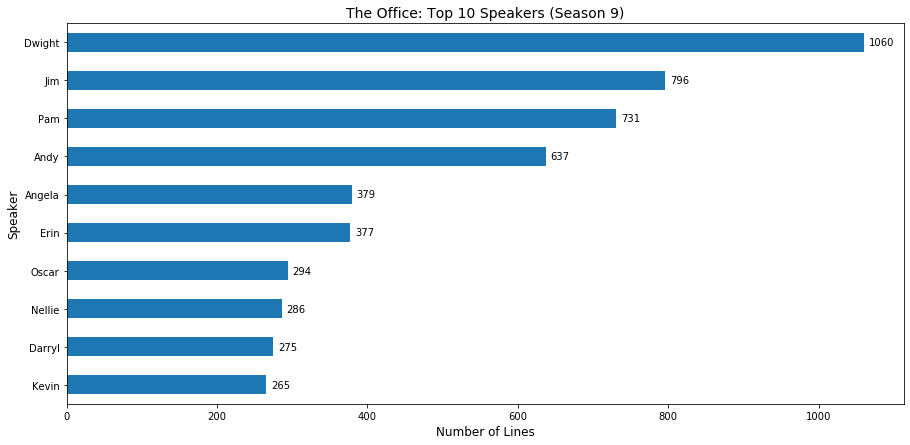

In [61]:
#Create bar chart of season rankings
ax = s9_lines_df.iloc[0:10].plot.barh(figsize=(15,7), rot=0, legend=False, fontsize = 10)


# Create and format value labels
# stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.0f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    
# Format chart
plt.title("The Office: Top 10 Speakers (Season 9)", fontsize=14)
plt.xlabel("Number of Lines", fontsize=12)
plt.ylabel("Speaker", fontsize=12)

ax.invert_yaxis()

# Save image
plt.savefig("../images/s9_speakers.png")

plt.show()

### Lines by Major Character

In [62]:
# Break out data by major characters
michael_lines = (lines_df[lines_df['speaker'] == "Michael"]).reset_index(drop=True)
dwight_lines = (lines_df[lines_df['speaker'] == "Dwight"]).reset_index(drop=True)
jim_lines = (lines_df[lines_df['speaker'] == "Jim"]).reset_index(drop=True)
pam_lines = (lines_df[lines_df['speaker'] == "Pam"]).reset_index(drop=True)
andy_lines = (lines_df[lines_df['speaker'] == "Andy"]).reset_index(drop=True)
angela_lines = (lines_df[lines_df['speaker'] == "Angela"]).reset_index(drop=True)
kevin_lines = (lines_df[lines_df['speaker'] == "Kevin"]).reset_index(drop=True)
erin_lines = (lines_df[lines_df['speaker'] == "Erin"]).reset_index(drop=True)
oscar_lines = (lines_df[lines_df['speaker'] == "Oscar"]).reset_index(drop=True)
ryan_lines = (lines_df[lines_df['speaker'] == "Ryan"]).reset_index(drop=True)
darryl_lines = (lines_df[lines_df['speaker'] == "Darryl"]).reset_index(drop=True)
phyllis_lines = (lines_df[lines_df['speaker'] == "Phyllis"]).reset_index(drop=True)
kelly_lines = (lines_df[lines_df['speaker'] == "Kelly"]).reset_index(drop=True)
toby_lines = (lines_df[lines_df['speaker'] == "Toby"]).reset_index(drop=True)
meredith_lines = (lines_df[lines_df['speaker'] == "Meredith"]).reset_index(drop=True)
stanley_lines = (lines_df[lines_df['speaker'] == "Stanley"]).reset_index(drop=True)

michael_lines

season  episode             title  scene  speaker  \
0           1        1             Pilot      1  Michael   
1           1        1             Pilot      1  Michael   
2           1        1             Pilot      1  Michael   
3           1        1             Pilot      2  Michael   
4           1        1             Pilot      3  Michael   
...       ...      ...               ...    ...      ...   
10794       7       22  Goodbye, Michael   5969  Michael   
10795       7       22  Goodbye, Michael   5970  Michael   
10796       7       22  Goodbye, Michael   5971  Michael   
10797       9       24            Finale   8109  Michael   
10798       9       24            Finale   8125  Michael   

                                                    line  
0      All right Jim. Your quarterlies look very good...  
1      So you've come to the master for guidance? Is ...  
2        All right. Well, let me show you how it's done.  
3      Yes, I'd like to speak to your office manager,...  
4      I've, uh, I've been at Dunder Mifflin for 12 y...  
...                                                  ...  
10794                                        Later guys.  
10795  Got almost everybody. So... Holly's my family ...  
10796  Well, I guess this is it. Hey will you guys le...  
10797                              That's what she said.  
10798  I feel like all my kids grew up and then they ...  

[10799 rows x 6 columns]

In [63]:
#Rank the seasons by user ratings
michael_lines_groupby = michael_lines.groupby(["season"]).count()["line"]

michael_lines_df = pd.DataFrame(michael_lines_groupby)
michael_lines_df

line
season      
1        490
2       1837
3       1702
4       1378
5       2063
6       1901
7       1426
9          2

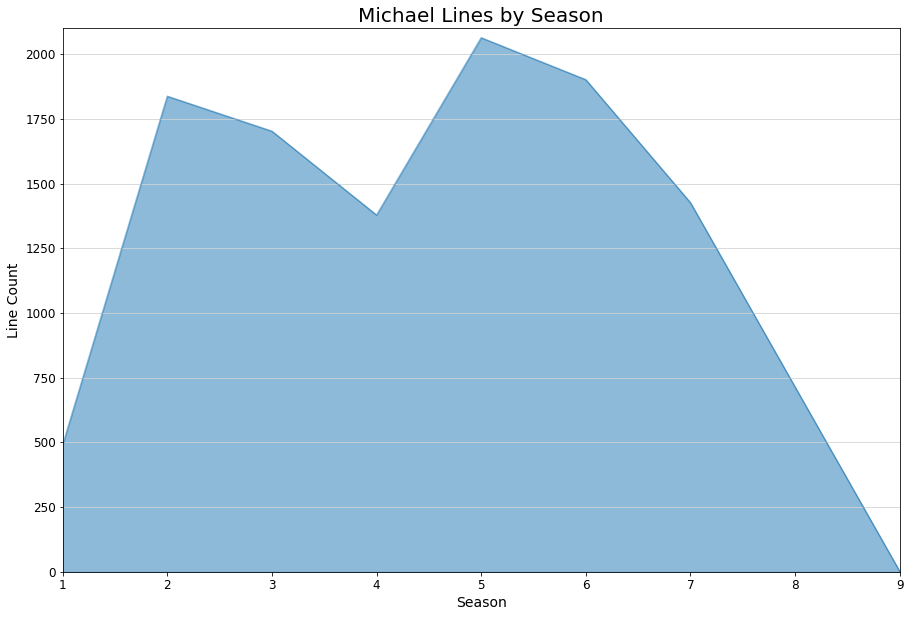

In [64]:
#Create bar chart of season rankings
ax = michael_lines_df.plot.area(stacked=False, figsize=(15, 10), legend = False, fontsize = 12)


             
# Format chart
plt.title("Michael Lines by Season", fontsize=20)
plt.xlabel("Season", fontsize = 14)
plt.ylabel("Line Count", fontsize = 14)
plt.grid(axis='y',color="lightgrey" )
plt.ylim(0, 2100)
plt.xlim(1, 9)


# Save image
plt.savefig("../images/michael_lines.png")

plt.show()


In [65]:
#Rank the seasons by user ratings
dwight_lines_groupby = dwight_lines.groupby(["season"]).count()["line"]

dwight_lines_df = pd.DataFrame(dwight_lines_groupby)
dwight_lines_df

line
season      
1        208
2        815
3        808
4        474
5       1026
6        777
7        694
8        897
9       1060

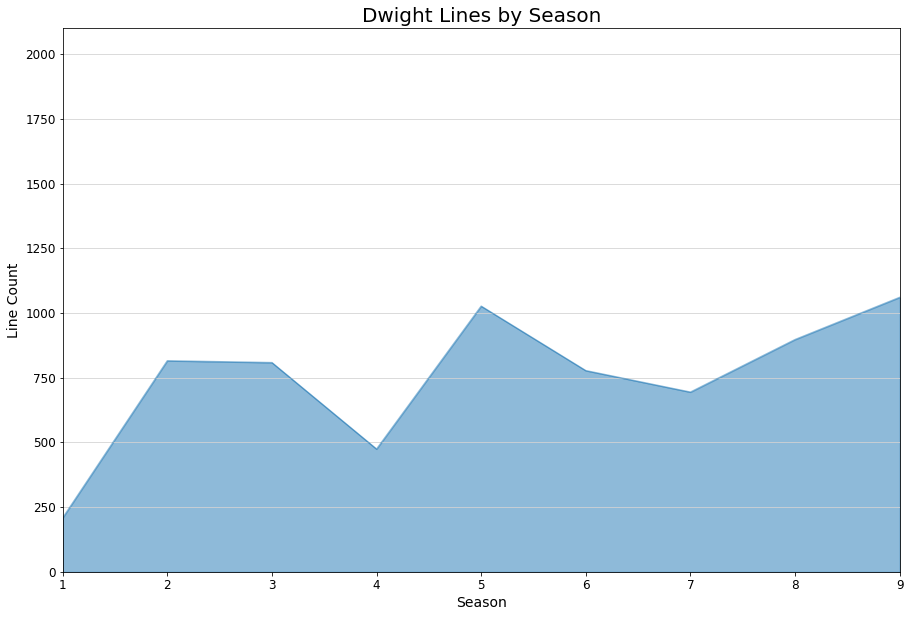

In [66]:
#Create bar chart of season rankings
ax = dwight_lines_df.plot.area(stacked=False, figsize=(15, 10), legend = False, fontsize = 12)


             
# Format chart
plt.title("Dwight Lines by Season", fontsize=20)
plt.xlabel("Season", fontsize = 14)
plt.ylabel("Line Count", fontsize = 14)
plt.grid(axis='y',color="lightgrey" )
plt.ylim(0, 2100)
plt.xlim(1, 9)


# Save image
plt.savefig("../images/dwight_lines.png")

plt.show()


In [67]:
#Rank the seasons by user ratings
jim_lines_groupby = jim_lines.groupby(["season"]).count()["line"]

jim_lines_df = pd.DataFrame(jim_lines_groupby)
jim_lines_df

line
season      
1        228
2        744
3        680
4        574
5        835
6        889
7        677
8        803
9        796

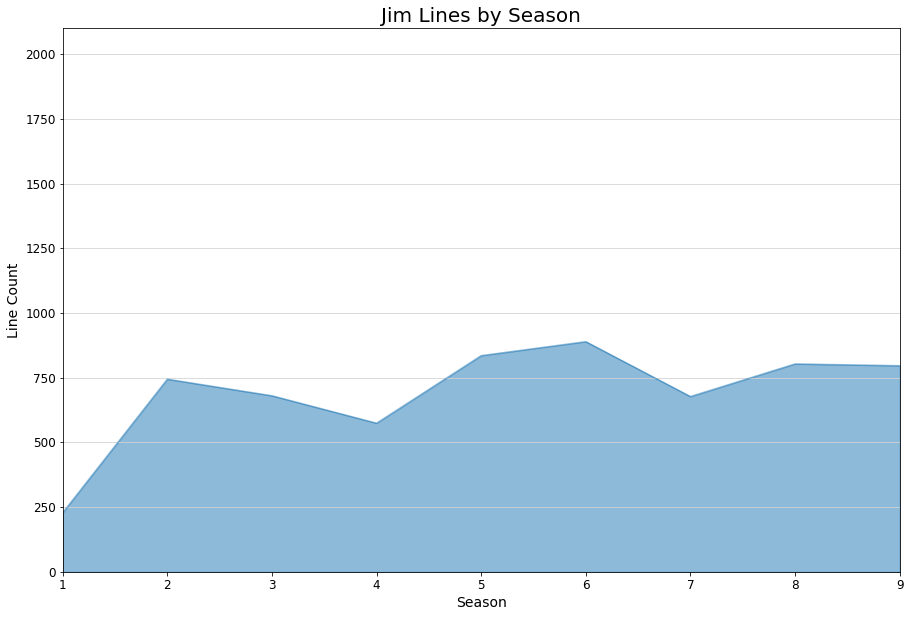

In [68]:
#Create bar chart of season rankings
ax = jim_lines_df.plot.area(stacked=False, figsize=(15, 10), legend = False, fontsize = 12)


             
# Format chart
plt.title("Jim Lines by Season", fontsize=20)
plt.xlabel("Season", fontsize = 14)
plt.ylabel("Line Count", fontsize = 14)
plt.grid(axis='y',color="lightgrey" )
plt.ylim(0, 2100)
plt.xlim(1, 9)


# Save image
plt.savefig("../images/jim_lines.png")

plt.show()


In [69]:
#Rank the seasons by user ratings
pam_lines_groupby = pam_lines.groupby(["season"]).count()["line"]

pam_lines_df = pd.DataFrame(pam_lines_groupby)
pam_lines_df

line
season      
1        162
2        611
3        593
4        437
5        696
6        674
7        618
8        456
9        731

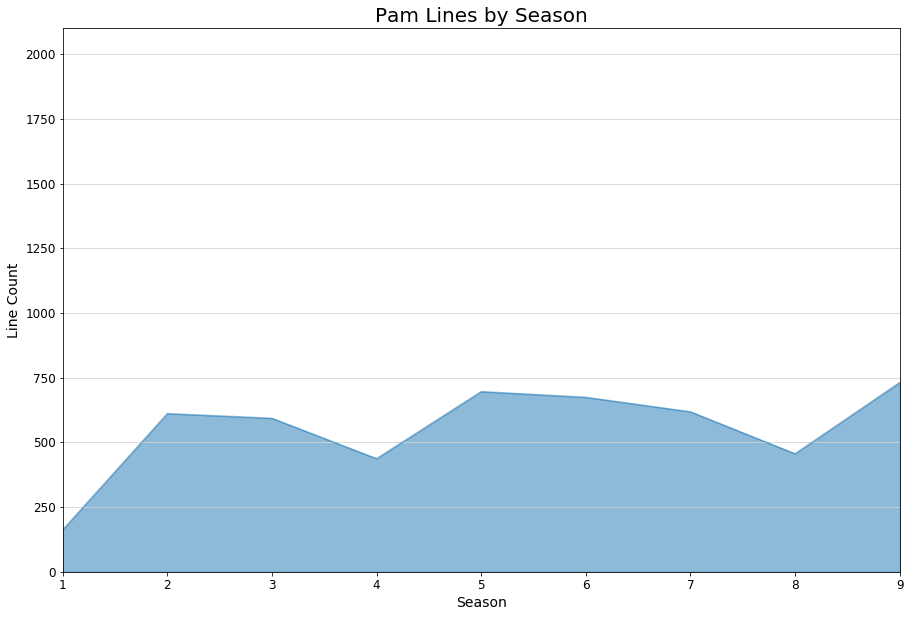

In [70]:
#Create bar chart of season rankings
ax = pam_lines_df.plot.area(stacked=False, figsize=(15, 10), legend = False, fontsize = 12)


             
# Format chart
plt.title("Pam Lines by Season", fontsize=20)
plt.xlabel("Season", fontsize = 14)
plt.ylabel("Line Count", fontsize = 14)
plt.grid(axis='y',color="lightgrey" )
plt.ylim(0, 2100)
plt.xlim(1, 9)


# Save image
plt.savefig("../images/pam_lines.png")

plt.show()


In [71]:
#Rank the seasons by user ratings
andy_lines_groupby = andy_lines.groupby(["season"]).count()["line"]

andy_lines_df = pd.DataFrame(andy_lines_groupby)
andy_lines_df

line
season      
3        300
4        184
5        477
6        501
7        551
8       1049
9        637

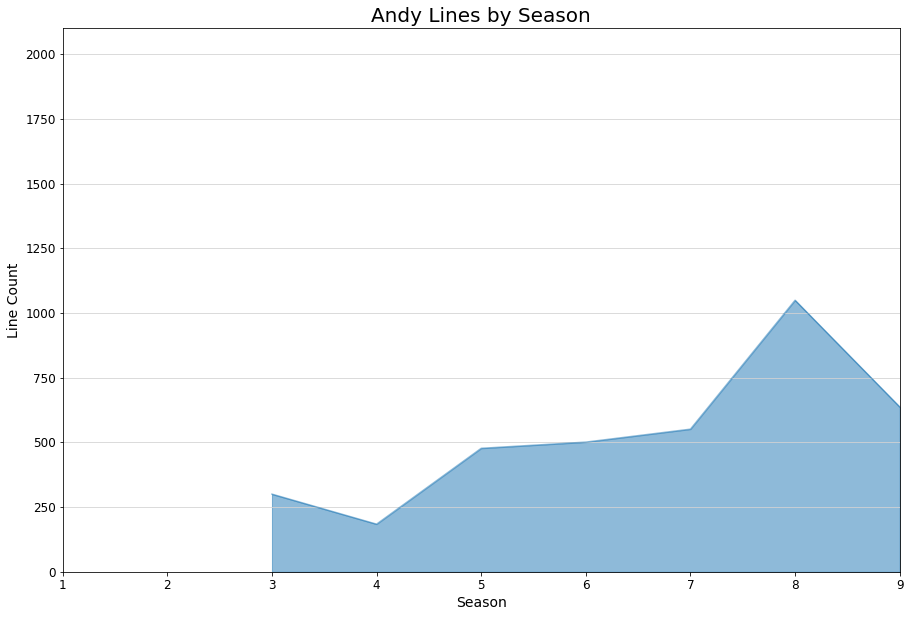

In [72]:
#Create bar chart of season rankings
ax = andy_lines_df.plot.area(stacked=False, figsize=(15, 10), legend = False, fontsize = 12)


             
# Format chart
plt.title("Andy Lines by Season", fontsize=20)
plt.xlabel("Season", fontsize = 14)
plt.ylabel("Line Count", fontsize = 14)
plt.grid(axis='y',color="lightgrey" )
plt.ylim(0, 2100)
plt.xlim(1, 9)


# Save image
plt.savefig("../images/andy_lines.png")

plt.show()


In [73]:
#Rank the seasons by user ratings
angela_lines_groupby = angela_lines.groupby(["season"]).count()["line"]

angela_lines_df = pd.DataFrame(angela_lines_groupby)
angela_lines_df

line
season      
1         23
2        131
3        196
4        167
5        206
6        119
7        159
8        156
9        379

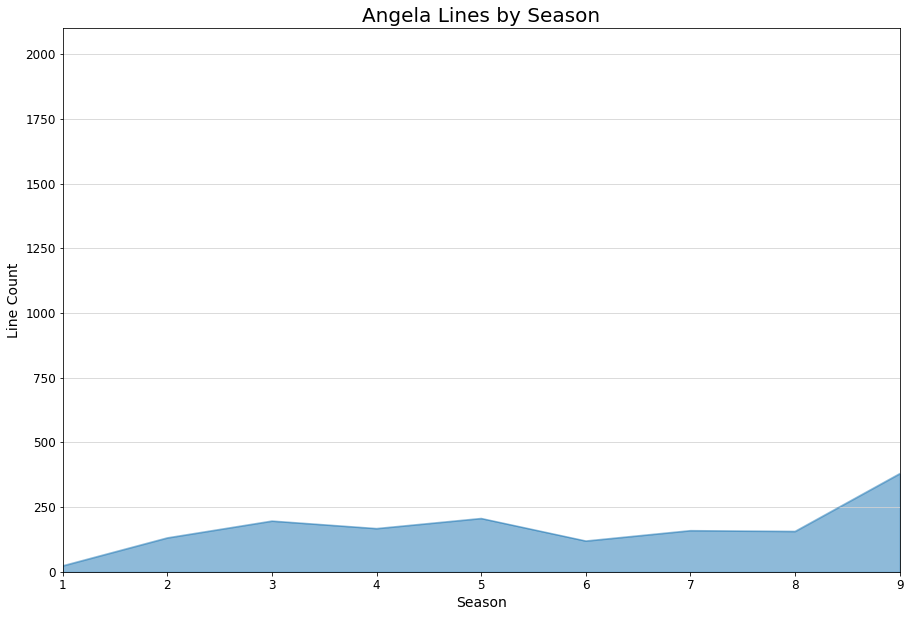

In [74]:
#Create bar chart of season rankings
ax = angela_lines_df.plot.area(stacked=False, figsize=(15, 10), legend = False, fontsize = 12)


             
# Format chart
plt.title("Angela Lines by Season", fontsize=20)
plt.xlabel("Season", fontsize = 14)
plt.ylabel("Line Count", fontsize = 14)
plt.grid(axis='y',color="lightgrey" )
plt.ylim(0, 2100)
plt.xlim(1, 9)


# Save image
plt.savefig("../images/angela_lines.png")

plt.show()


In [75]:
#Rank the seasons by user ratings
kevin_lines_groupby = kevin_lines.groupby(["season"]).count()["line"]

kevin_lines_df = pd.DataFrame(kevin_lines_groupby)
kevin_lines_df

line
season      
1         23
2        117
3        161
4        125
5        156
6        220
7        240
8        228
9        265

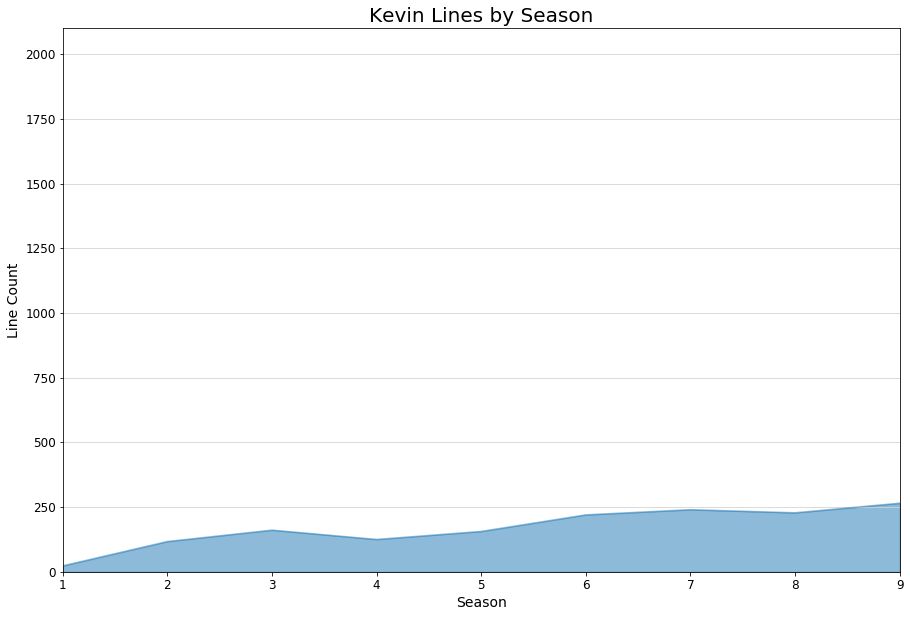

In [76]:
#Create bar chart of season rankings
ax = kevin_lines_df.plot.area(stacked=False, figsize=(15, 10), legend = False, fontsize = 12)


             
# Format chart
plt.title("Kevin Lines by Season", fontsize=20)
plt.xlabel("Season", fontsize = 14)
plt.ylabel("Line Count", fontsize = 14)
plt.grid(axis='y',color="lightgrey" )
plt.ylim(0, 2100)
plt.xlim(1, 9)


# Save image
plt.savefig("../images/kevin_lines.png")

plt.show()


In [77]:
#Rank the seasons by user ratings
erin_lines_groupby = erin_lines.groupby(["season"]).count()["line"]

erin_lines_df = pd.DataFrame(erin_lines_groupby)
erin_lines_df

line
season      
5         53
6        279
7        308
8        396
9        377

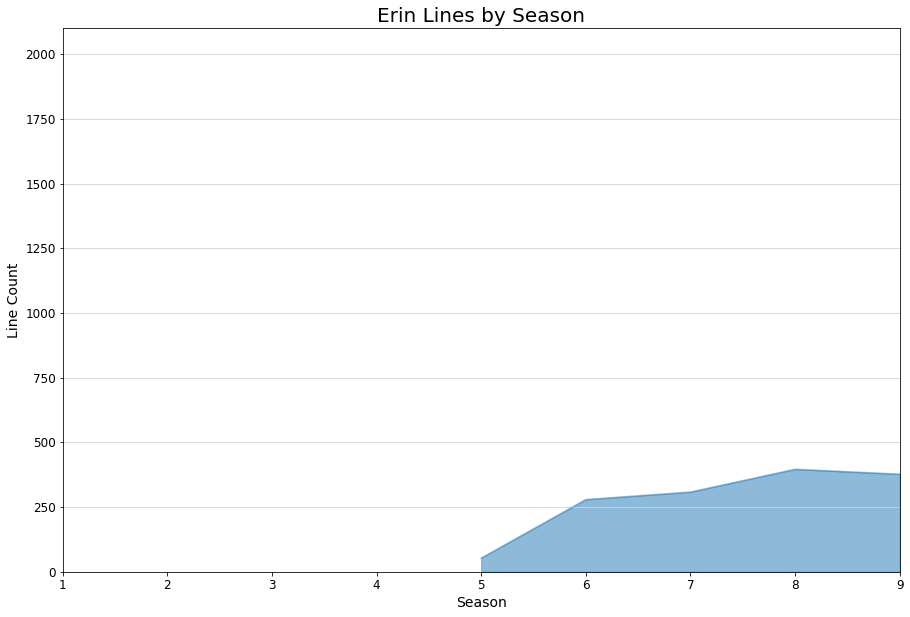

In [78]:
#Create bar chart of season rankings
ax = erin_lines_df.plot.area(stacked=False, figsize=(15, 10), legend = False, fontsize = 12)


             
# Format chart
plt.title("Erin Lines by Season", fontsize=20)
plt.xlabel("Season", fontsize = 14)
plt.ylabel("Line Count", fontsize = 14)
plt.grid(axis='y',color="lightgrey" )
plt.ylim(0, 2100)
plt.xlim(1, 9)


# Save image
plt.savefig("../images/erin_lines.png")

plt.show()


In [79]:
#Rank the seasons by user ratings
oscar_lines_groupby = oscar_lines.groupby(["season"]).count()["line"]

oscar_lines_df = pd.DataFrame(oscar_lines_groupby)
oscar_lines_df

line
season      
1         42
2         92
3         59
4         80
5        195
6        156
7        196
8        222
9        294

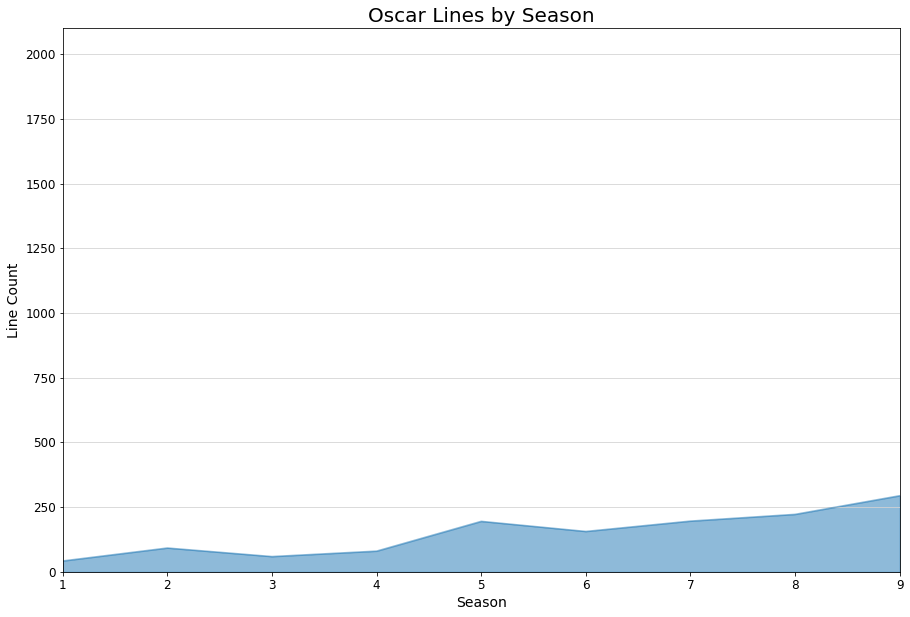

In [80]:
#Create bar chart of season rankings
ax = oscar_lines_df.plot.area(stacked=False, figsize=(15, 10), legend = False, fontsize = 12)


             
# Format chart
plt.title("Oscar Lines by Season", fontsize=20)
plt.xlabel("Season", fontsize = 14)
plt.ylabel("Line Count", fontsize = 14)
plt.grid(axis='y',color="lightgrey" )
plt.ylim(0, 2100)
plt.xlim(1, 9)


# Save image
plt.savefig("../images/oscar_lines.png")

plt.show()


In [81]:
#Rank the seasons by user ratings
ryan_lines_groupby = ryan_lines.groupby(["season"]).count()["line"]

ryan_lines_df = pd.DataFrame(ryan_lines_groupby)
ryan_lines_df

line
season      
1         37
2        163
3        140
4        201
5        154
6        120
7        175
8        176
9         16

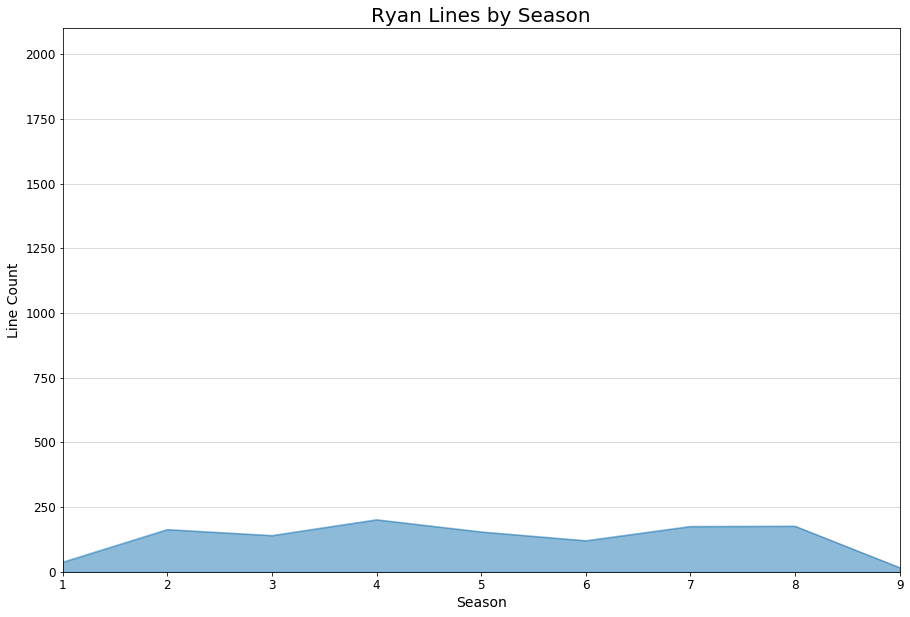

In [82]:
#Create bar chart of season rankings
ax = ryan_lines_df.plot.area(stacked=False, figsize=(15, 10), legend = False, fontsize = 12)


             
# Format chart
plt.title("Ryan Lines by Season", fontsize=20)
plt.xlabel("Season", fontsize = 14)
plt.ylabel("Line Count", fontsize = 14)
plt.grid(axis='y',color="lightgrey" )
plt.ylim(0, 2100)
plt.xlim(1, 9)


# Save image
plt.savefig("../images/ryan_lines.png")

plt.show()


In [83]:
#Rank the seasons by user ratings
darryl_lines_groupby = darryl_lines.groupby(["season"]).count()["line"]

darryl_lines_df = pd.DataFrame(darryl_lines_groupby)
darryl_lines_df

line
season      
1         15
2         63
3         80
4         58
5         72
6         74
7        226
8        298
9        275

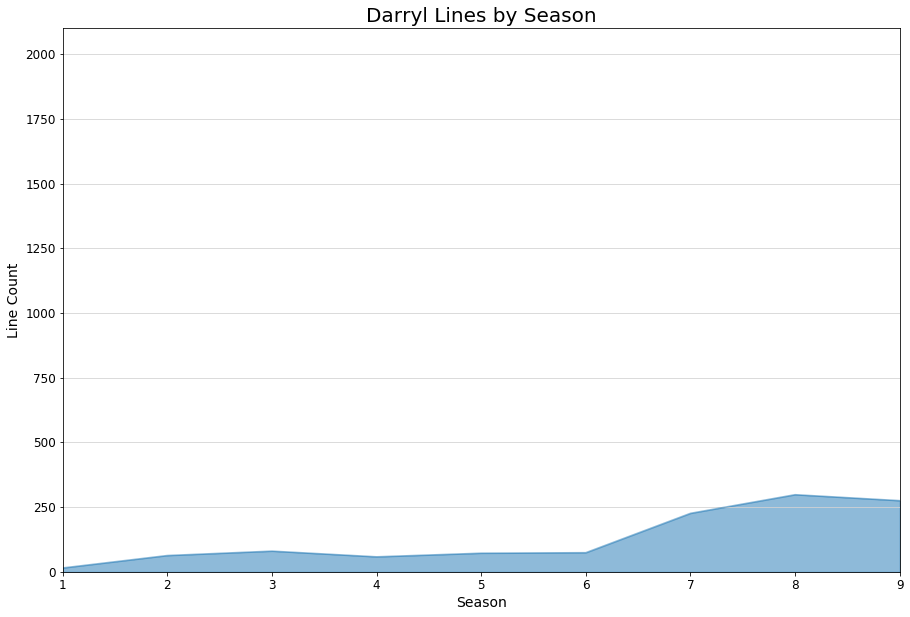

In [84]:
#Create bar chart of season rankings
ax = darryl_lines_df.plot.area(stacked=False, figsize=(15, 10), legend = False, fontsize = 12)


             
# Format chart
plt.title("Darryl Lines by Season", fontsize=20)
plt.xlabel("Season", fontsize = 14)
plt.ylabel("Line Count", fontsize = 14)
plt.grid(axis='y',color="lightgrey" )
plt.ylim(0, 2100)
plt.xlim(1, 9)


# Save image
plt.savefig("../images/darryl_lines.png")

plt.show()


In [85]:
#Rank the seasons by user ratings
phyllis_lines_groupby = phyllis_lines.groupby(["season"]).count()["line"]

phyllis_lines_df = pd.DataFrame(phyllis_lines_groupby)
phyllis_lines_df

line
season      
1         11
2         90
3         98
4         78
5        169
6        132
7        148
8        113
9        127

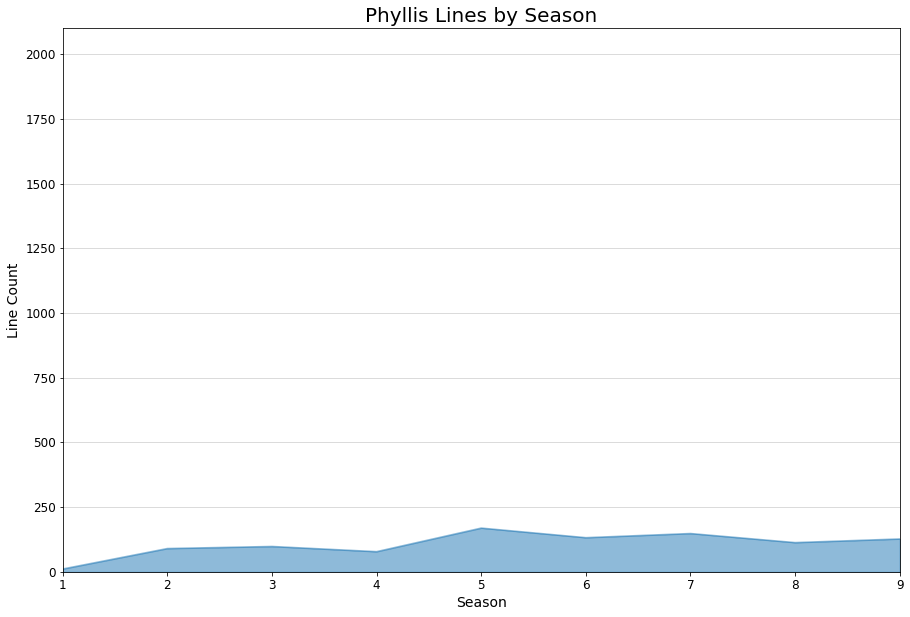

In [86]:
#Create bar chart of season rankings
ax = phyllis_lines_df.plot.area(stacked=False, figsize=(15, 10), legend = False, fontsize = 12)


             
# Format chart
plt.title("Phyllis Lines by Season", fontsize=20)
plt.xlabel("Season", fontsize = 14)
plt.ylabel("Line Count", fontsize = 14)
plt.grid(axis='y',color="lightgrey" )
plt.ylim(0, 2100)
plt.xlim(1, 9)


# Save image
plt.savefig("../images/phyllis_lines.png")

plt.show()


In [87]:
#Rank the seasons by user ratings
kelly_lines_groupby = kelly_lines.groupby(["season"]).count()["line"]

kelly_lines_df = pd.DataFrame(kelly_lines_groupby)
kelly_lines_df

line
season      
1          2
2         91
3        116
4         70
5        146
6        116
7        153
8        114
9         14

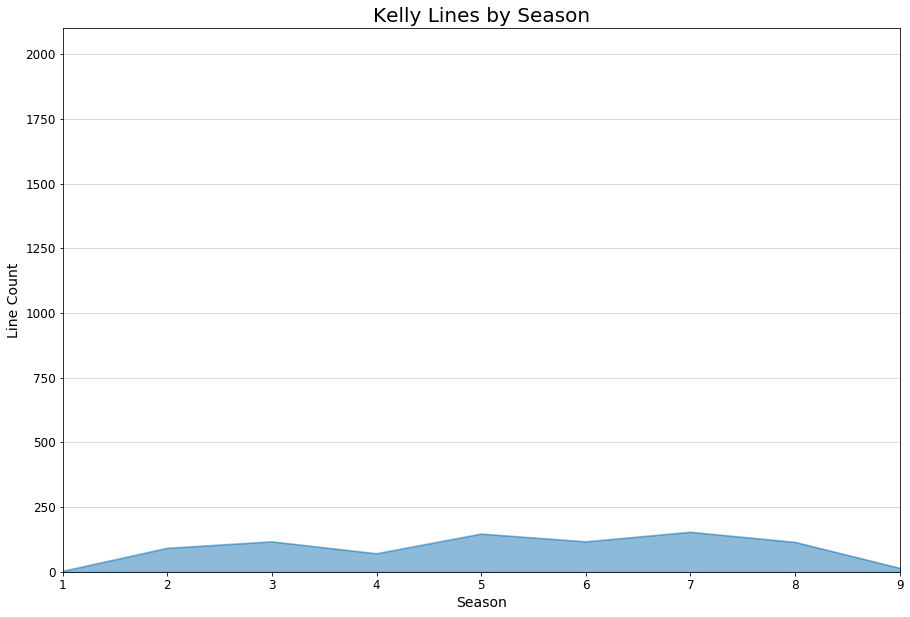

In [88]:
#Create bar chart of season rankings
ax = kelly_lines_df.plot.area(stacked=False, figsize=(15, 10), legend = False, fontsize = 12)


             
# Format chart
plt.title("Kelly Lines by Season", fontsize=20)
plt.xlabel("Season", fontsize = 14)
plt.ylabel("Line Count", fontsize = 14)
plt.grid(axis='y',color="lightgrey" )
plt.ylim(0, 2100)
plt.xlim(1, 9)


# Save image
plt.savefig("../images/kelly_lines.png")

plt.show()


In [89]:
#Rank the seasons by user ratings
toby_lines_groupby = toby_lines.groupby(["season"]).count()["line"]

toby_lines_df = pd.DataFrame(toby_lines_groupby)
toby_lines_df

line
season      
1         12
2        103
3        103
4        111
5         66
6         99
7         97
8        100
9        122

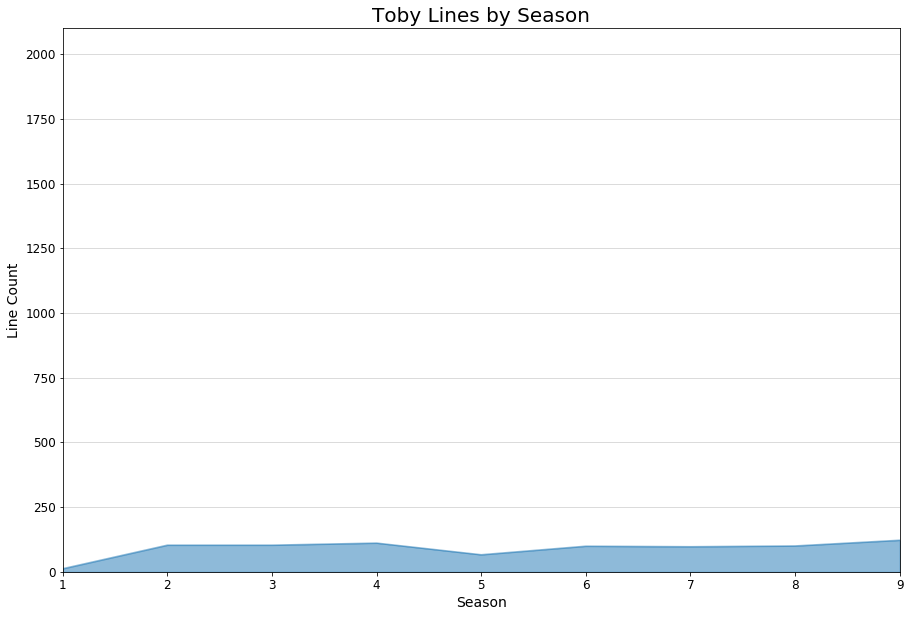

In [90]:
#Create bar chart of season rankings
ax = toby_lines_df.plot.area(stacked=False, figsize=(15, 10), legend = False, fontsize = 12)


             
# Format chart
plt.title("Toby Lines by Season", fontsize=20)
plt.xlabel("Season", fontsize = 14)
plt.ylabel("Line Count", fontsize = 14)
plt.grid(axis='y',color="lightgrey" )
plt.ylim(0, 2100)
plt.xlim(1, 9)


# Save image
plt.savefig("../images/toby_lines.png")

plt.show()


In [91]:
#Rank the seasons by user ratings
meredith_lines_groupby = meredith_lines.groupby(["season"]).count()["line"]

meredith_lines_df = pd.DataFrame(meredith_lines_groupby)
meredith_lines_df

line
season      
1         13
2         31
3         30
4         46
5        100
6         81
7         70
8         71
9        114

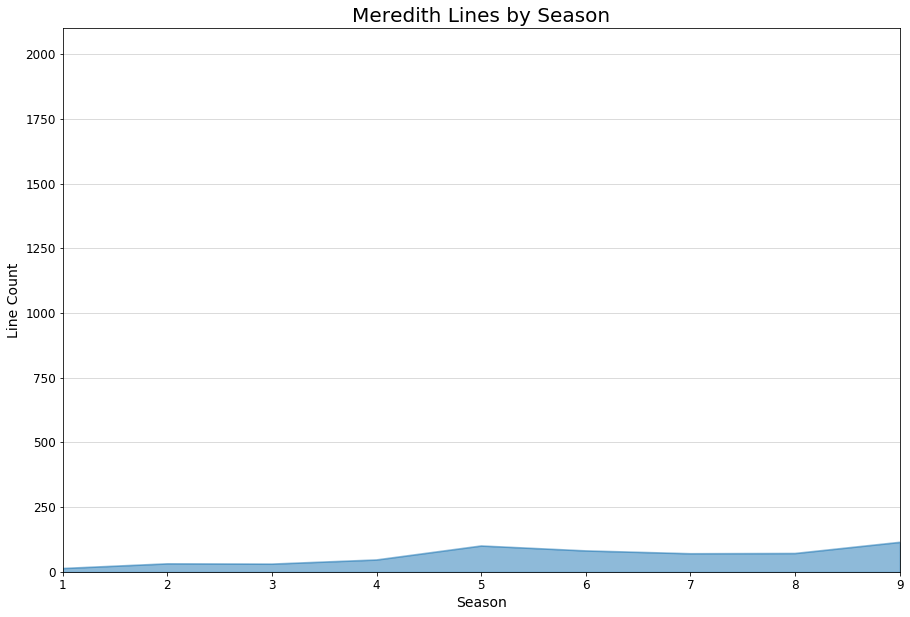

In [92]:
#Create bar chart of season rankings
ax = meredith_lines_df.plot.area(stacked=False, figsize=(15, 10), legend = False, fontsize = 12)


             
# Format chart
plt.title("Meredith Lines by Season", fontsize=20)
plt.xlabel("Season", fontsize = 14)
plt.ylabel("Line Count", fontsize = 14)
plt.grid(axis='y',color="lightgrey" )
plt.ylim(0, 2100)
plt.xlim(1, 9)


# Save image
plt.savefig("../images/meredith_lines.png")

plt.show()


In [93]:
#Rank the seasons by user ratings
stanley_lines_groupby = stanley_lines.groupby(["season"]).count()["line"]

stanley_lines_df = pd.DataFrame(stanley_lines_groupby)
stanley_lines_df

line
season      
1         24
2         77
3         69
4         73
5        106
6         70
7         75
8         83
9         96

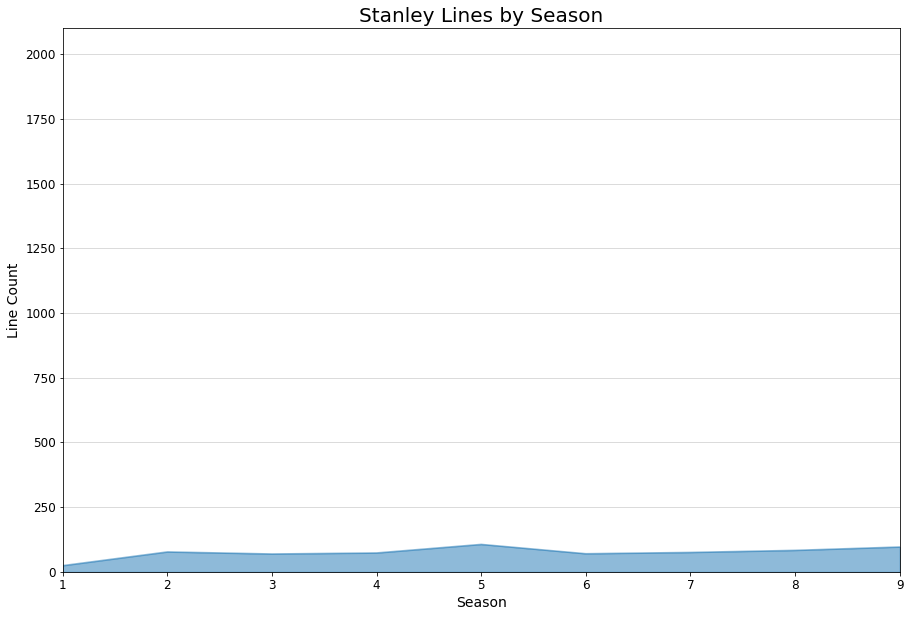

In [94]:
#Create bar chart of season rankings
ax = stanley_lines_df.plot.area(stacked=False, figsize=(15, 10), legend = False, fontsize = 12)


             
# Format chart
plt.title("Stanley Lines by Season", fontsize=20)
plt.xlabel("Season", fontsize = 14)
plt.ylabel("Line Count", fontsize = 14)
plt.grid(axis='y',color="lightgrey" )
plt.ylim(0, 2100)
plt.xlim(1, 9)


# Save image
plt.savefig("../images/stanley_lines.png")

plt.show()


###  Text Sentiment

In [95]:
# Install modules, if needed
# pip install nltk
# pip install wordcloud
# pip install textblob
# nltk.download('stopwords')

In [96]:
# Import modules
# data-science-blog.com/en/blog/2018/11/04/sentiment-analysis-using-python/
# medium.com/analytics-vidhya/simplify-your-dataset-cleaning-with-pandas-75951b23568e

%matplotlib inline  
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob



In [97]:
# Copy data
sentiment_df = lines_df.copy()

# Change the lines type to string
sentiment_df['line'] = sentiment_df['line'].astype(str)

# Make all text lowercase
sentiment_df['line'] = sentiment_df['line'].apply(lambda x: " ".join(x.lower() for x in x.split()))

sentiment_df['line'][1]

"oh, i told you. i couldn't close it. so..."

In [98]:
# Remove punctuation
spec_chars = ["!",'"',"#","%","&","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]

for char in spec_chars:
    sentiment_df['line'] = sentiment_df['line'].str.replace(char, ' ')

sentiment_df['line'] = sentiment_df['line'].str.split().str.join(" ")
sentiment_df['line'][1]

"oh i told you i couldn't close it so"

In [99]:
# Remove common english words
stop = stopwords.words('english')
sentiment_df['line'] = sentiment_df['line'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
sentiment_df['line'][1]

'oh told close'

In [100]:
def senti(x):
    return TextBlob(x).sentiment.polarity  

sentiment_df['polarity'] = sentiment_df['line'].apply(senti)

sentiment_df.head()


season  episode  title  scene  speaker  \
0       1        1  Pilot      1  Michael   
1       1        1  Pilot      1      Jim   
2       1        1  Pilot      1  Michael   
3       1        1  Pilot      1      Jim   
4       1        1  Pilot      1  Michael   

                                             line  polarity  
0  right jim quarterlies look good things library  0.492857  
1                                   oh told close  0.000000  
2         come master guidance saying grasshopper  0.000000  
3                            actually called yeah  0.000000  
4                        right well let show done  0.285714

In [101]:
sentiment_groupby = sentiment_df.groupby(["season"]).mean()["polarity"]
sentiment_season_pd = pd.DataFrame(sentiment_groupby)
sentiment_season_pd

polarity
season          
1       0.114729
2       0.089133
3       0.086623
4       0.089575
5       0.081619
6       0.081335
7       0.087053
8       0.084183
9       0.078199

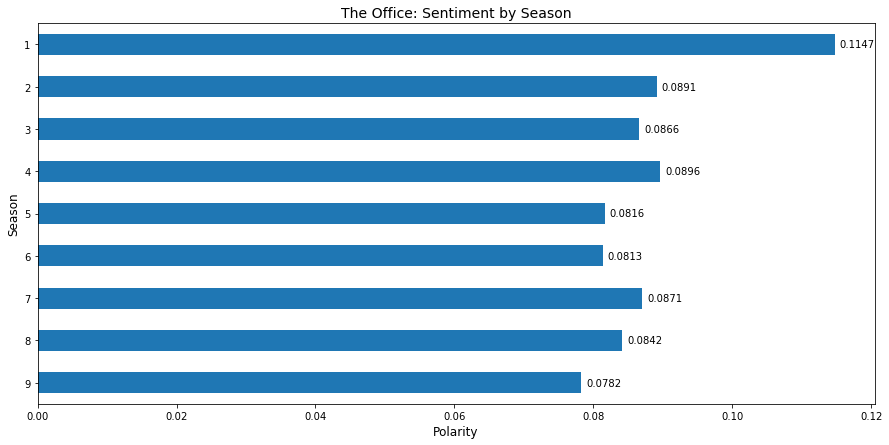

In [102]:
#Create bar chart of season rankings
ax = sentiment_season_pd.plot.barh(figsize=(15,7), rot=0, legend=False, fontsize = 10)


# Create and format value labels
# stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.4f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    
# Format chart
plt.title("The Office: Sentiment by Season", fontsize=14)
plt.xlabel("Polarity", fontsize=12)
plt.ylabel("Season", fontsize=12)

ax.invert_yaxis()

# Save image
plt.savefig("../images/season_sentiment.png")

plt.show()

In [103]:
# Break out sentiment by major characters
michael_sentiment = (sentiment_df[sentiment_df['speaker'] == "Michael"]).reset_index(drop=True)
dwight_sentiment = (sentiment_df[sentiment_df['speaker'] == "Dwight"]).reset_index(drop=True)
jim_sentiment = (sentiment_df[sentiment_df['speaker'] == "Jim"]).reset_index(drop=True)
pam_sentiment = (sentiment_df[sentiment_df['speaker'] == "Pam"]).reset_index(drop=True)
andy_sentiment = (sentiment_df[sentiment_df['speaker'] == "Andy"]).reset_index(drop=True)
angela_sentiment = (sentiment_df[sentiment_df['speaker'] == "Angela"]).reset_index(drop=True)
kevin_sentiment = (sentiment_df[sentiment_df['speaker'] == "Kevin"]).reset_index(drop=True)
erin_sentiment = (sentiment_df[sentiment_df['speaker'] == "Erin"]).reset_index(drop=True)
oscar_sentiment = (sentiment_df[sentiment_df['speaker'] == "Oscar"]).reset_index(drop=True)
ryan_sentiment = (sentiment_df[sentiment_df['speaker'] == "Ryan"]).reset_index(drop=True)
darryl_sentiment = (sentiment_df[sentiment_df['speaker'] == "Darryl"]).reset_index(drop=True)
phyllis_sentiment = (sentiment_df[sentiment_df['speaker'] == "Phyllis"]).reset_index(drop=True)
kelly_sentiment = (sentiment_df[sentiment_df['speaker'] == "Kelly"]).reset_index(drop=True)
toby_sentiment = (sentiment_df[sentiment_df['speaker'] == "Toby"]).reset_index(drop=True)
meredith_sentiment = (sentiment_df[sentiment_df['speaker'] == "Meredith"]).reset_index(drop=True)
stanley_sentiment = (sentiment_df[sentiment_df['speaker'] == "Stanley"]).reset_index(drop=True)

In [169]:
sentiment_all = sentiment_df.groupby(["speaker"]).mean()["polarity"]
sentiment_all

speaker
3rd Athlead Employee    0.000000
4th Athlead Employee    0.600000
A.J.                    0.122619
AJ                      0.140625
Aaron Rodgers           0.012500
                          ...   
Young Man               0.200000
Young Michael           0.125000
Younger Guy             0.000000
Zeke                    0.021852
Zion                    0.000000
Name: polarity, Length: 704, dtype: float64

In [104]:
michael_sentiment_groupby = michael_sentiment.groupby(["season"]).mean()["polarity"]
michael_sentiment_season_pd = pd.DataFrame(michael_sentiment_groupby)
michael_sentiment_season_pd

polarity
season          
1       0.138845
2       0.109131
3       0.108484
4       0.105040
5       0.106827
6       0.099304
7       0.107234
9       0.125000

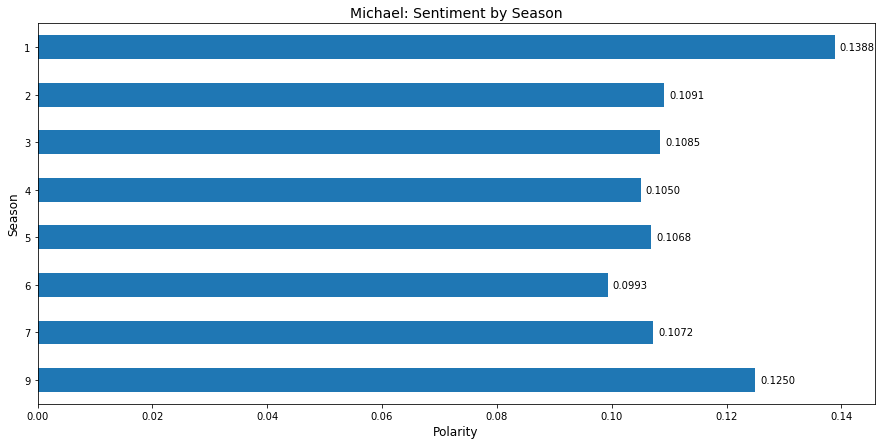

In [105]:
#Create bar chart of season rankings
ax = michael_sentiment_season_pd.plot.barh(figsize=(15,7), rot=0, legend=False, fontsize = 10)


# Create and format value labels
# stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.4f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    
# Format chart
plt.title("Michael: Sentiment by Season", fontsize=14)
plt.xlabel("Polarity", fontsize=12)
plt.ylabel("Season", fontsize=12)

ax.invert_yaxis()

# Save image
plt.savefig("../images/michael_sentiment.png")

plt.show()

In [106]:
dwight_sentiment_groupby = dwight_sentiment.groupby(["season"]).mean()["polarity"]
dwight_sentiment_season_pd = pd.DataFrame(dwight_sentiment_groupby)
dwight_sentiment_season_pd

polarity
season          
1       0.094203
2       0.074166
3       0.065316
4       0.069322
5       0.065788
6       0.054499
7       0.087168
8       0.078639
9       0.084992

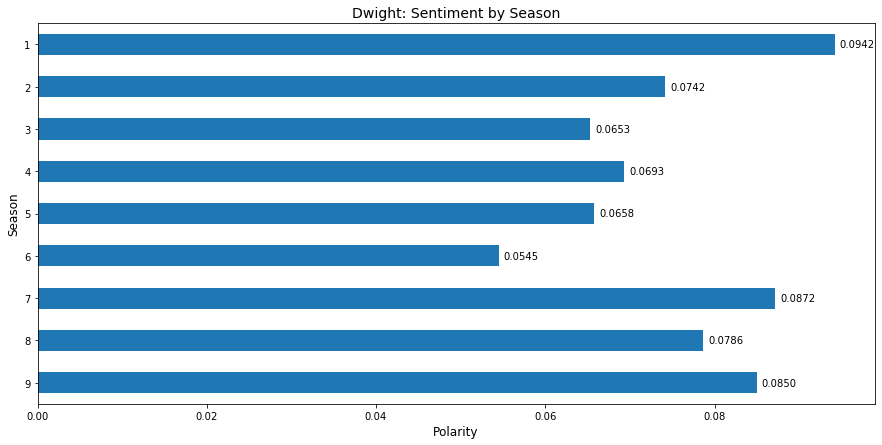

In [107]:
#Create bar chart of season rankings
ax = dwight_sentiment_season_pd.plot.barh(figsize=(15,7), rot=0, legend=False, fontsize = 10)


# Create and format value labels
# stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.4f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    
# Format chart
plt.title("Dwight: Sentiment by Season", fontsize=14)
plt.xlabel("Polarity", fontsize=12)
plt.ylabel("Season", fontsize=12)

ax.invert_yaxis()

# Save image
plt.savefig("../images/dwight_sentiment.png")

plt.show()

In [108]:
jim_sentiment_groupby = jim_sentiment.groupby(["season"]).mean()["polarity"]
jim_sentiment_season_pd = pd.DataFrame(jim_sentiment_groupby)
jim_sentiment_season_pd

polarity
season          
1       0.161053
2       0.112275
3       0.097085
4       0.094876
5       0.088942
6       0.099272
7       0.098388
8       0.098961
9       0.109441

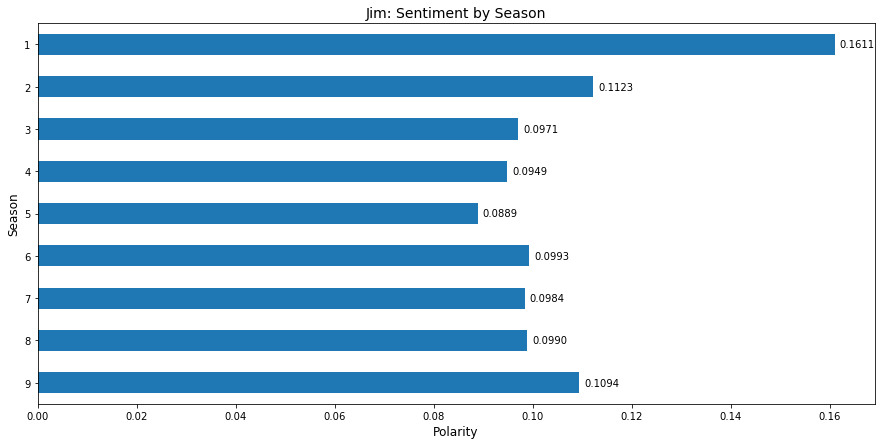

In [109]:
#Create bar chart of season rankings
ax = jim_sentiment_season_pd.plot.barh(figsize=(15,7), rot=0, legend=False, fontsize = 10)


# Create and format value labels
# stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.4f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    
# Format chart
plt.title("Jim: Sentiment by Season", fontsize=14)
plt.xlabel("Polarity", fontsize=12)
plt.ylabel("Season", fontsize=12)

ax.invert_yaxis()

# Save image
plt.savefig("../images/jim_sentiment.png")

plt.show()

In [110]:
pam_sentiment_groupby = pam_sentiment.groupby(["season"]).mean()["polarity"]
pam_sentiment_season_pd = pd.DataFrame(pam_sentiment_groupby)
pam_sentiment_season_pd

polarity
season          
1       0.075059
2       0.078475
3       0.083921
4       0.106519
5       0.073182
6       0.098736
7       0.093675
8       0.126502
9       0.093835

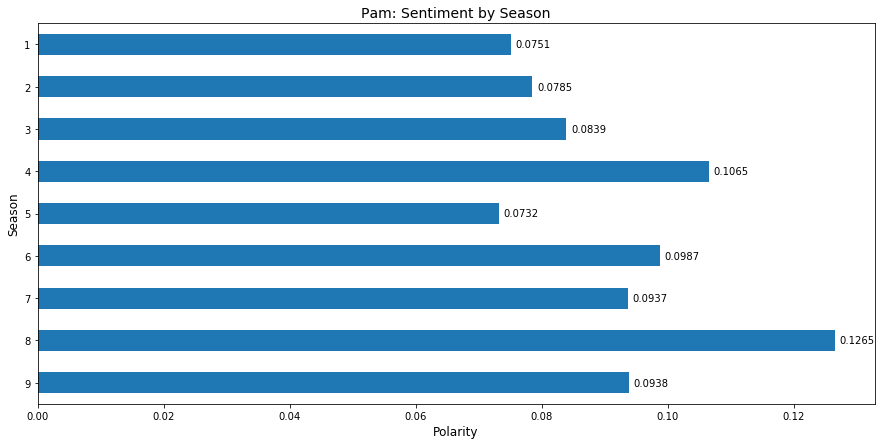

In [111]:
#Create bar chart of season rankings
ax = pam_sentiment_season_pd.plot.barh(figsize=(15,7), rot=0, legend=False, fontsize = 10)


# Create and format value labels
# stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.4f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    
# Format chart
plt.title("Pam: Sentiment by Season", fontsize=14)
plt.xlabel("Polarity", fontsize=12)
plt.ylabel("Season", fontsize=12)

ax.invert_yaxis()

# Save image
plt.savefig("../images/pam_sentiment.png")

plt.show()

In [112]:
andy_sentiment_groupby = andy_sentiment.groupby(["season"]).mean()["polarity"]
andy_sentiment_season_pd = pd.DataFrame(andy_sentiment_groupby)
andy_sentiment_season_pd

polarity
season          
3       0.073596
4       0.080629
5       0.077801
6       0.061802
7       0.075403
8       0.088015
9       0.072353

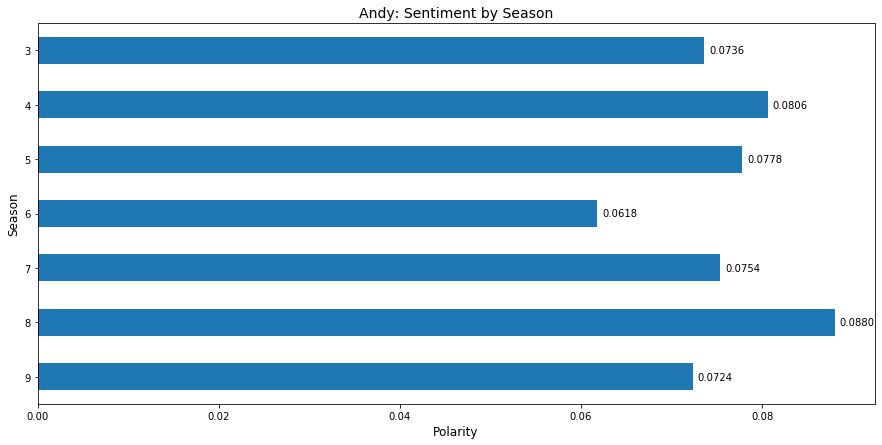

In [113]:
#Create bar chart of season rankings
ax = andy_sentiment_season_pd.plot.barh(figsize=(15,7), rot=0, legend=False, fontsize = 10)


# Create and format value labels
# stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.4f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    
# Format chart
plt.title("Andy: Sentiment by Season", fontsize=14)
plt.xlabel("Polarity", fontsize=12)
plt.ylabel("Season", fontsize=12)

ax.invert_yaxis()

# Save image
plt.savefig("../images/andy_sentiment.png")

plt.show()

In [114]:
angela_sentiment_groupby = angela_sentiment.groupby(["season"]).mean()["polarity"]
angela_sentiment_season_pd = pd.DataFrame(angela_sentiment_groupby)
angela_sentiment_season_pd

polarity
season          
1      -0.013406
2       0.029494
3       0.021983
4       0.006906
5       0.035721
6       0.027171
7       0.054440
8       0.076623
9       0.073322

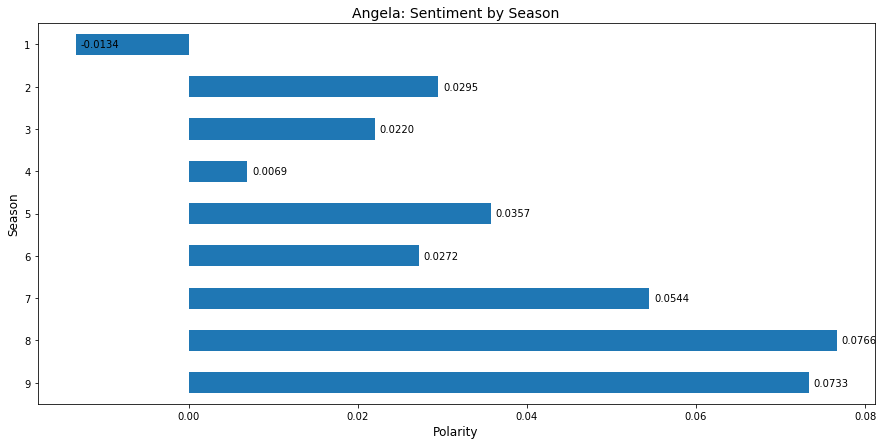

In [115]:
#Create bar chart of season rankings
ax = angela_sentiment_season_pd.plot.barh(figsize=(15,7), rot=0, legend=False, fontsize = 10)


# Create and format value labels
# stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.4f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    
# Format chart
plt.title("Angela: Sentiment by Season", fontsize=14)
plt.xlabel("Polarity", fontsize=12)
plt.ylabel("Season", fontsize=12)

ax.invert_yaxis()

# Save image
plt.savefig("../images/angela_sentiment.png")

plt.show()

In [116]:
kevin_sentiment_groupby = kevin_sentiment.groupby(["season"]).mean()["polarity"]
kevin_sentiment_season_pd = pd.DataFrame(kevin_sentiment_groupby)
kevin_sentiment_season_pd

polarity
season          
1       0.049189
2       0.013879
3       0.065171
4       0.065937
5       0.025157
6       0.082400
7       0.072764
8       0.071035
9       0.059610

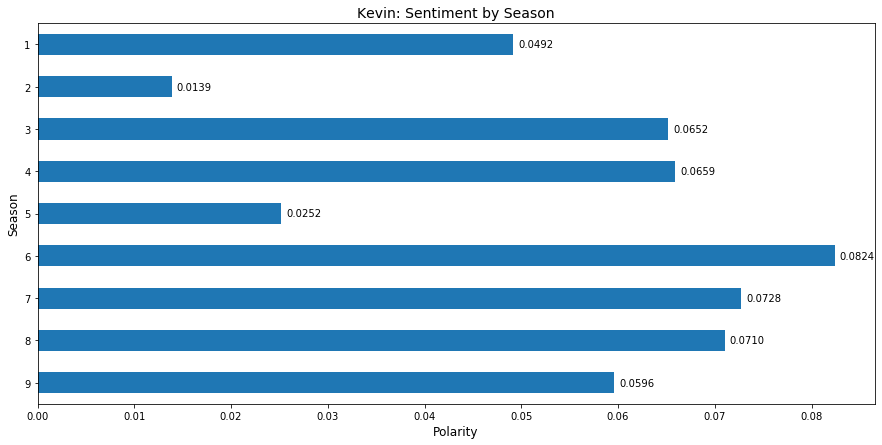

In [117]:
#Create bar chart of season rankings
ax = kevin_sentiment_season_pd.plot.barh(figsize=(15,7), rot=0, legend=False, fontsize = 10)


# Create and format value labels
# stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.4f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    
# Format chart
plt.title("Kevin: Sentiment by Season", fontsize=14)
plt.xlabel("Polarity", fontsize=12)
plt.ylabel("Season", fontsize=12)

ax.invert_yaxis()

# Save image
plt.savefig("../images/kevin_sentiment.png")

plt.show()

In [118]:
erin_sentiment_groupby = erin_sentiment.groupby(["season"]).mean()["polarity"]
erin_sentiment_season_pd = pd.DataFrame(erin_sentiment_groupby)
erin_sentiment_season_pd

polarity
season          
5       0.040364
6       0.083380
7       0.073800
8       0.062879
9       0.061815

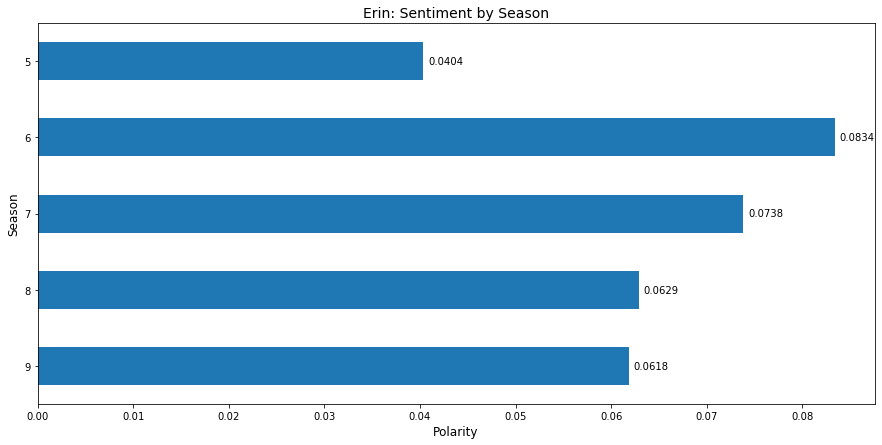

In [119]:
#Create bar chart of season rankings
ax = erin_sentiment_season_pd.plot.barh(figsize=(15,7), rot=0, legend=False, fontsize = 10)


# Create and format value labels
# stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.4f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    
# Format chart
plt.title("Erin: Sentiment by Season", fontsize=14)
plt.xlabel("Polarity", fontsize=12)
plt.ylabel("Season", fontsize=12)

ax.invert_yaxis()

# Save image
plt.savefig("../images/erin_sentiment.png")

plt.show()

In [120]:
oscar_sentiment_groupby = oscar_sentiment.groupby(["season"]).mean()["polarity"]
oscar_sentiment_season_pd = pd.DataFrame(oscar_sentiment_groupby)
oscar_sentiment_season_pd

polarity
season          
1       0.102268
2       0.044568
3       0.093893
4       0.115394
5       0.055768
6       0.053638
7       0.054916
8       0.081530
9       0.031381

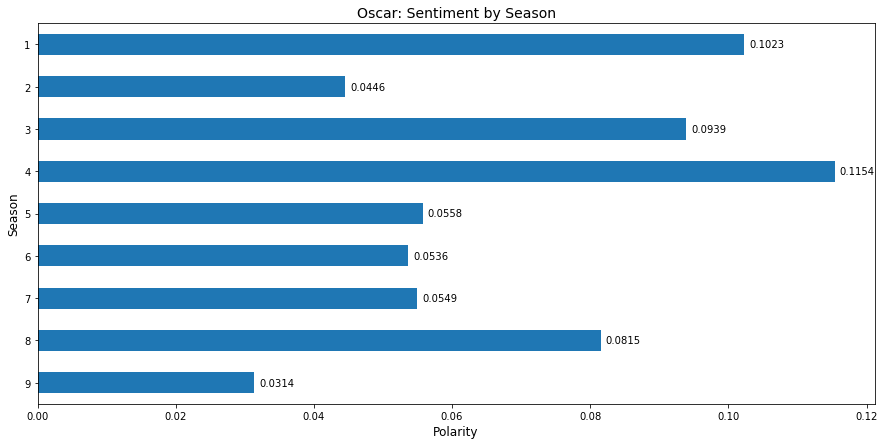

In [121]:
#Create bar chart of season rankings
ax = oscar_sentiment_season_pd.plot.barh(figsize=(15,7), rot=0, legend=False, fontsize = 10)


# Create and format value labels
# stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.4f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    
# Format chart
plt.title("Oscar: Sentiment by Season", fontsize=14)
plt.xlabel("Polarity", fontsize=12)
plt.ylabel("Season", fontsize=12)

ax.invert_yaxis()

# Save image
plt.savefig("../images/oscar_sentiment.png")

plt.show()

In [122]:
ryan_sentiment_groupby = ryan_sentiment.groupby(["season"]).mean()["polarity"]
ryan_sentiment_season_pd = pd.DataFrame(ryan_sentiment_groupby)
ryan_sentiment_season_pd

polarity
season          
1       0.121911
2       0.046004
3       0.087818
4       0.129690
5       0.102190
6       0.066747
7       0.117066
8       0.087604
9       0.105954

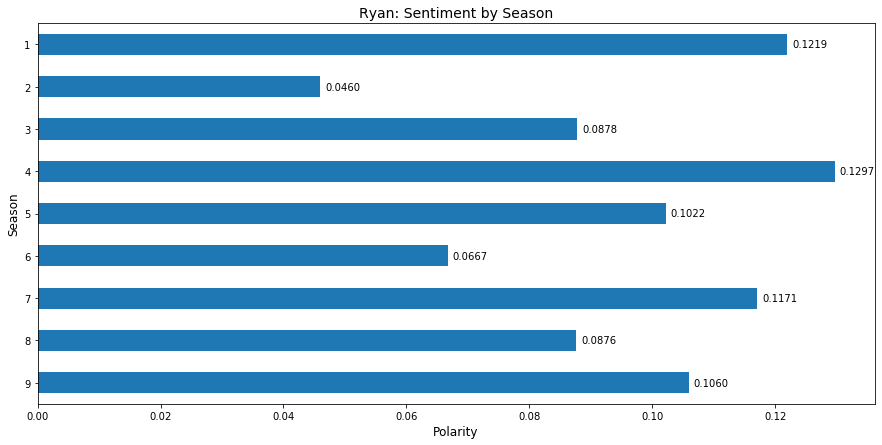

In [123]:
#Create bar chart of season rankings
ax = ryan_sentiment_season_pd.plot.barh(figsize=(15,7), rot=0, legend=False, fontsize = 10)


# Create and format value labels
# stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.4f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    
# Format chart
plt.title("Ryan: Sentiment by Season", fontsize=14)
plt.xlabel("Polarity", fontsize=12)
plt.ylabel("Season", fontsize=12)

ax.invert_yaxis()

# Save image
plt.savefig("../images/ryan_sentiment.png")

plt.show()

In [124]:
darryl_sentiment_groupby = darryl_sentiment.groupby(["season"]).mean()["polarity"]
darryl_sentiment_season_pd = pd.DataFrame(darryl_sentiment_groupby)
darryl_sentiment_season_pd

polarity
season          
1       0.123413
2       0.011111
3       0.106056
4       0.013301
5       0.044676
6       0.029475
7       0.060090
8       0.097129
9       0.078593

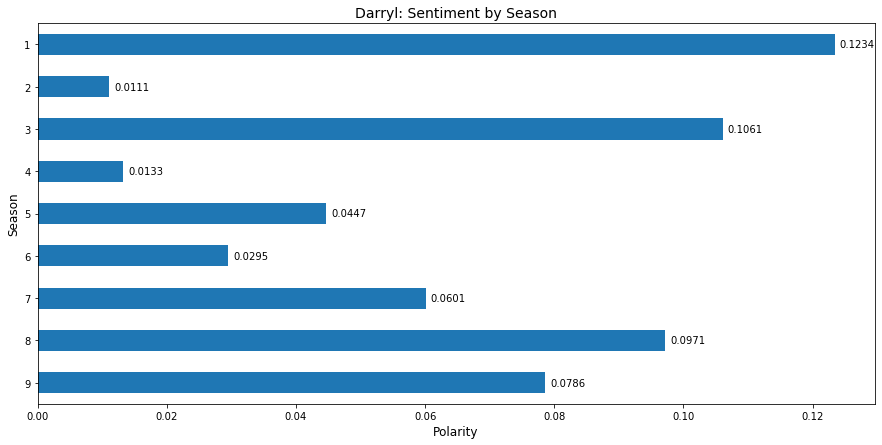

In [125]:
#Create bar chart of season rankings
ax = darryl_sentiment_season_pd.plot.barh(figsize=(15,7), rot=0, legend=False, fontsize = 10)


# Create and format value labels
# stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.4f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    
# Format chart
plt.title("Darryl: Sentiment by Season", fontsize=14)
plt.xlabel("Polarity", fontsize=12)
plt.ylabel("Season", fontsize=12)

ax.invert_yaxis()

# Save image
plt.savefig("../images/darryl_sentiment.png")

plt.show()

In [126]:
phyllis_sentiment_groupby = phyllis_sentiment.groupby(["season"]).mean()["polarity"]
phyllis_sentiment_season_pd = pd.DataFrame(phyllis_sentiment_groupby)
phyllis_sentiment_season_pd

polarity
season          
1      -0.112500
2       0.073959
3       0.067952
4      -0.015949
5       0.059438
6       0.029370
7       0.122080
8       0.044054
9       0.069321

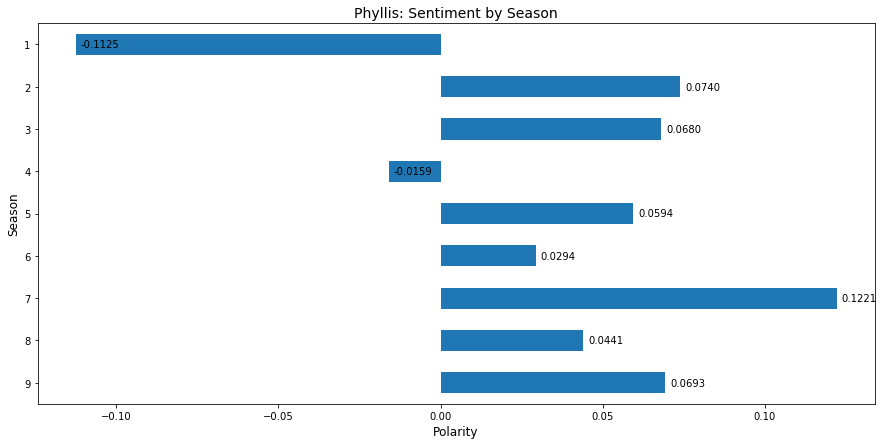

In [127]:
#Create bar chart of season rankings
ax = phyllis_sentiment_season_pd.plot.barh(figsize=(15,7), rot=0, legend=False, fontsize = 10)


# Create and format value labels
# stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.4f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    
# Format chart
plt.title("Phyllis: Sentiment by Season", fontsize=14)
plt.xlabel("Polarity", fontsize=12)
plt.ylabel("Season", fontsize=12)

ax.invert_yaxis()

# Save image
plt.savefig("../images/phyllis_sentiment.png")

plt.show()

In [128]:
kelly_sentiment_groupby = kelly_sentiment.groupby(["season"]).mean()["polarity"]
kelly_sentiment_season_pd = pd.DataFrame(kelly_sentiment_groupby)
kelly_sentiment_season_pd

polarity
season          
1       0.000000
2       0.065629
3       0.038321
4       0.031292
5       0.023378
6       0.032657
7       0.078364
8       0.026972
9       0.117121

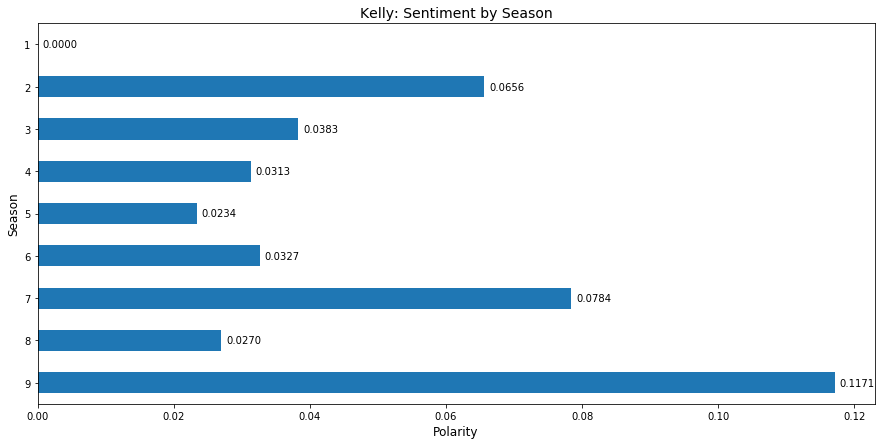

In [129]:
#Create bar chart of season rankings
ax = kelly_sentiment_season_pd.plot.barh(figsize=(15,7), rot=0, legend=False, fontsize = 10)


# Create and format value labels
# stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.4f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    
# Format chart
plt.title("Kelly: Sentiment by Season", fontsize=14)
plt.xlabel("Polarity", fontsize=12)
plt.ylabel("Season", fontsize=12)

ax.invert_yaxis()

# Save image
plt.savefig("../images/kelly_sentiment.png")

plt.show()

In [130]:
toby_sentiment_groupby = toby_sentiment.groupby(["season"]).mean()["polarity"]
toby_sentiment_season_pd = pd.DataFrame(toby_sentiment_groupby)
toby_sentiment_season_pd

polarity
season          
1       0.133333
2       0.055693
3       0.081192
4       0.100388
5       0.113163
6       0.100103
7       0.051795
8       0.099105
9       0.055607

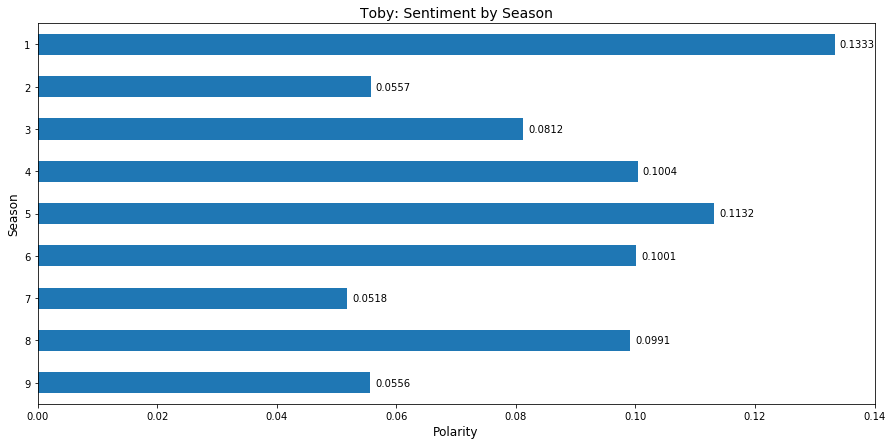

In [131]:
#Create bar chart of season rankings
ax = toby_sentiment_season_pd.plot.barh(figsize=(15,7), rot=0, legend=False, fontsize = 10)


# Create and format value labels
# stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.4f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    
# Format chart
plt.title("Toby: Sentiment by Season", fontsize=14)
plt.xlabel("Polarity", fontsize=12)
plt.ylabel("Season", fontsize=12)

ax.invert_yaxis()

# Save image
plt.savefig("../images/toby_sentiment.png")

plt.show()

In [132]:
meredith_sentiment_groupby = meredith_sentiment.groupby(["season"]).mean()["polarity"]
meredith_sentiment_season_pd = pd.DataFrame(meredith_sentiment_groupby)
meredith_sentiment_season_pd

polarity
season          
1       0.053251
2       0.100126
3      -0.012768
4       0.063043
5       0.024390
6       0.013771
7       0.077586
8      -0.001052
9       0.049240

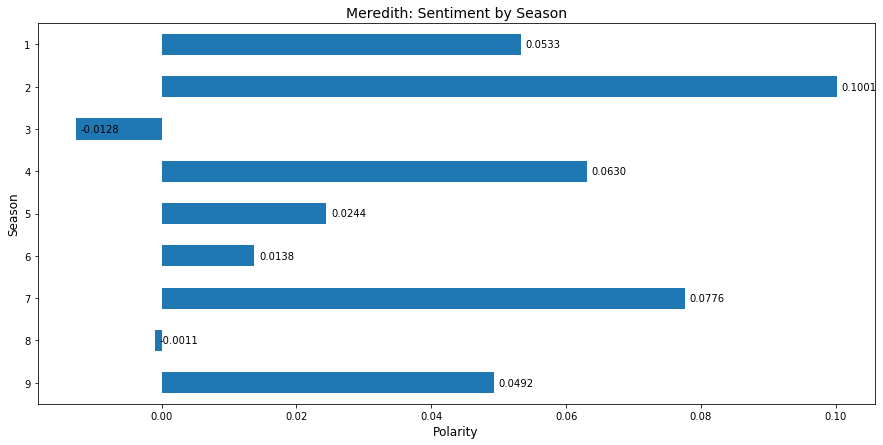

In [133]:
#Create bar chart of season rankings
ax = meredith_sentiment_season_pd.plot.barh(figsize=(15,7), rot=0, legend=False, fontsize = 10)


# Create and format value labels
# stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.4f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    
# Format chart
plt.title("Meredith: Sentiment by Season", fontsize=14)
plt.xlabel("Polarity", fontsize=12)
plt.ylabel("Season", fontsize=12)

ax.invert_yaxis()

# Save image
plt.savefig("../images/meredith_sentiment.png")

plt.show()

In [134]:
stanley_sentiment_groupby = stanley_sentiment.groupby(["season"]).mean()["polarity"]
stanley_sentiment_season_pd = pd.DataFrame(stanley_sentiment_groupby)
stanley_sentiment_season_pd

polarity
season          
1       0.035590
2       0.009562
3       0.056393
4      -0.002450
5       0.050338
6       0.021837
7       0.016791
8       0.068089
9       0.033901

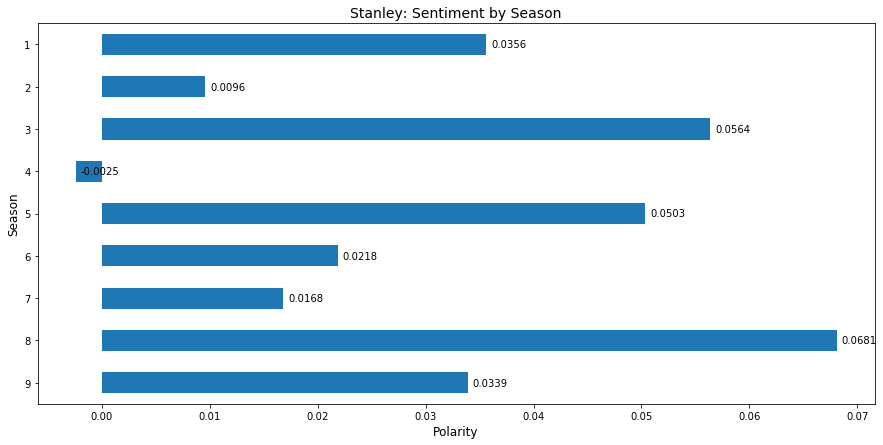

In [135]:
#Create bar chart of season rankings
ax = stanley_sentiment_season_pd.plot.barh(figsize=(15,7), rot=0, legend=False, fontsize = 10)


# Create and format value labels
# stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.4f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    
# Format chart
plt.title("Stanley: Sentiment by Season", fontsize=14)
plt.xlabel("Polarity", fontsize=12)
plt.ylabel("Season", fontsize=12)

ax.invert_yaxis()

# Save image
plt.savefig("../images/stanley_sentiment.png")

plt.show()

## Word Cloud

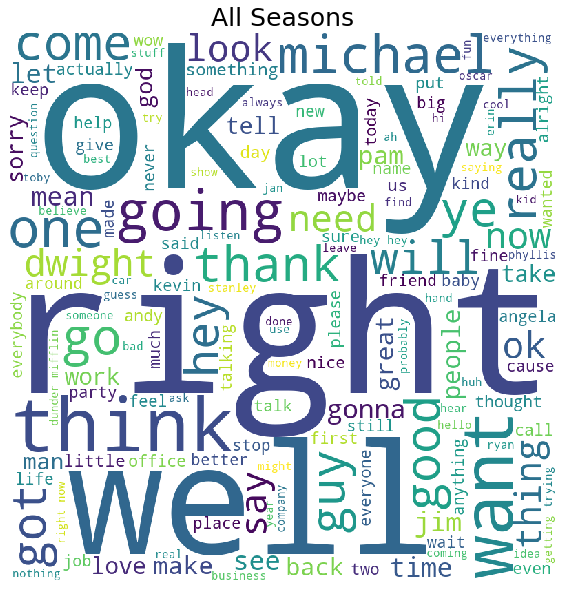

In [136]:
# Create Word Cloud
# www.geeksforgeeks.org/generating-word-cloud-python/

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in lines_df['line']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords,
                max_words = 150,
                min_font_size = 10).generate(comment_words) 
  
# Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.title("All Seasons", fontsize = 25, color = "black")
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

# Save image
plt.savefig("../images/word_cloud_all.png")
  
plt.show() 

### Season One Word Cloud

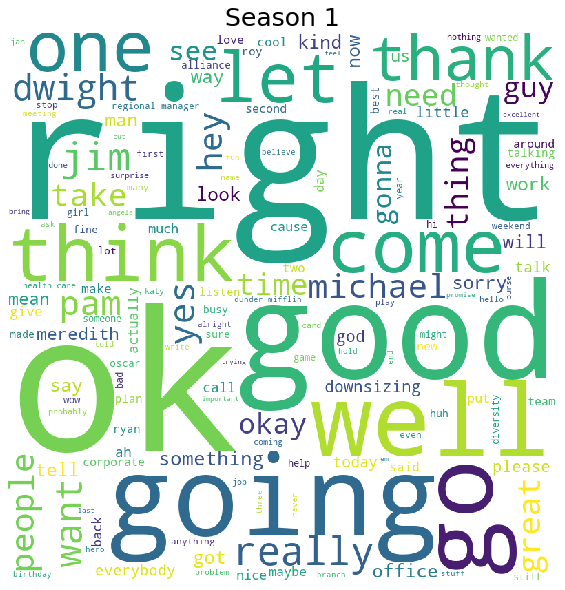

In [137]:
# Create Word Cloud
# www.geeksforgeeks.org/generating-word-cloud-python/

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in s1_lines_breakout['line']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords,
                max_words = 150,
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.title("Season 1", fontsize = 25, color = "black")
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

# Save image
plt.savefig("../images/word_cloud_s1.png")
  
plt.show() 

### Season 2 Word Cloud

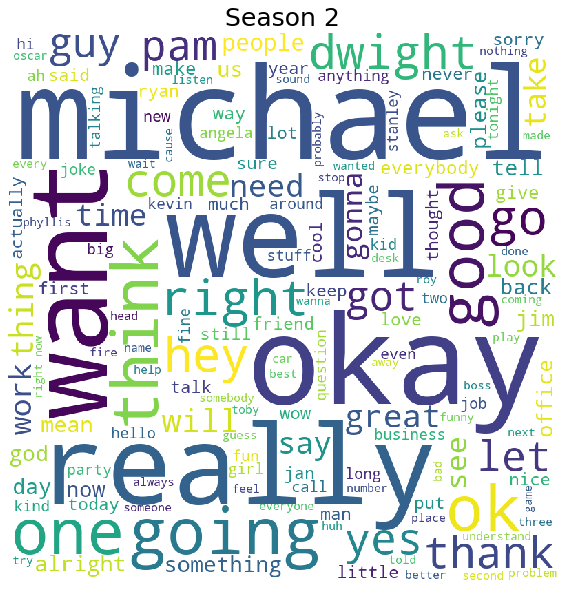

In [138]:
# Create Word Cloud
# www.geeksforgeeks.org/generating-word-cloud-python/

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in s2_lines_breakout['line']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords,
                max_words = 150,
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.title("Season 2", fontsize = 25, color = "black")
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

# Save image
plt.savefig("../images/word_cloud_s2.png")
  
plt.show() 

### Season 3 Word Cloud

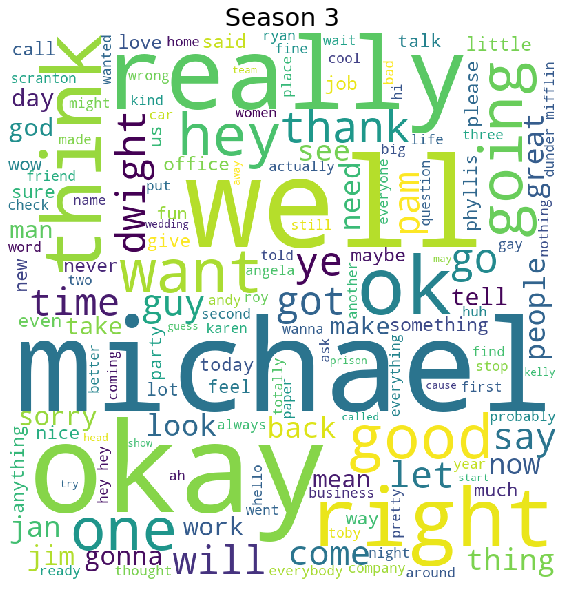

In [139]:
# Create Word Cloud
# www.geeksforgeeks.org/generating-word-cloud-python/

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in s3_lines_breakout['line']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords,
                max_words = 150,
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.title("Season 3", fontsize = 25, color = "black")
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

# Save image
plt.savefig("../images/word_cloud_s3.png")
  
plt.show() 

### Season 4 Word Cloud

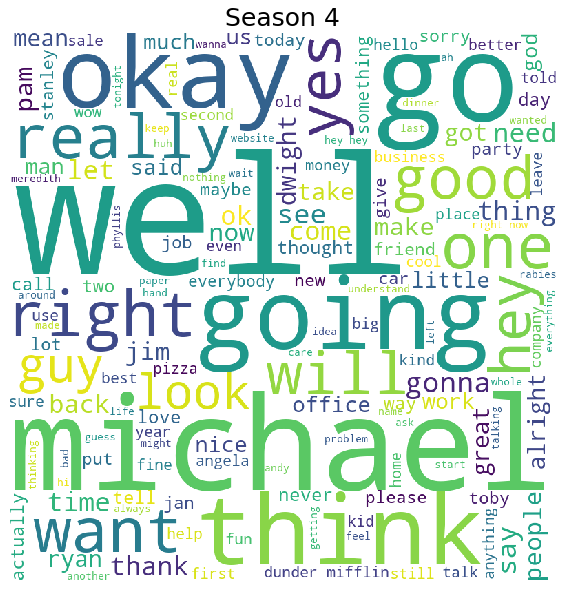

In [140]:
# Create Word Cloud
# www.geeksforgeeks.org/generating-word-cloud-python/

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in s4_lines_breakout['line']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                max_words = 150,
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.title("Season 4", fontsize = 25, color = "black")
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

# Save image
plt.savefig("../images/word_cloud_s4.png")
  
plt.show() 

### Season 5 Word Cloud

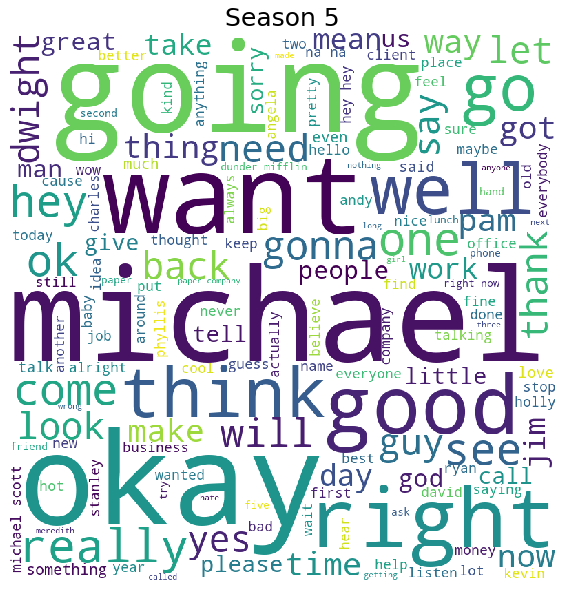

In [141]:
# Create Word Cloud
# www.geeksforgeeks.org/generating-word-cloud-python/

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in s5_lines_breakout['line']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                max_words = 150,
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.title("Season 5", fontsize = 25, color = "black")
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

# Save image
plt.savefig("../images/word_cloud_s5.png")
  
plt.show() 

### Season 6 Word Cloud

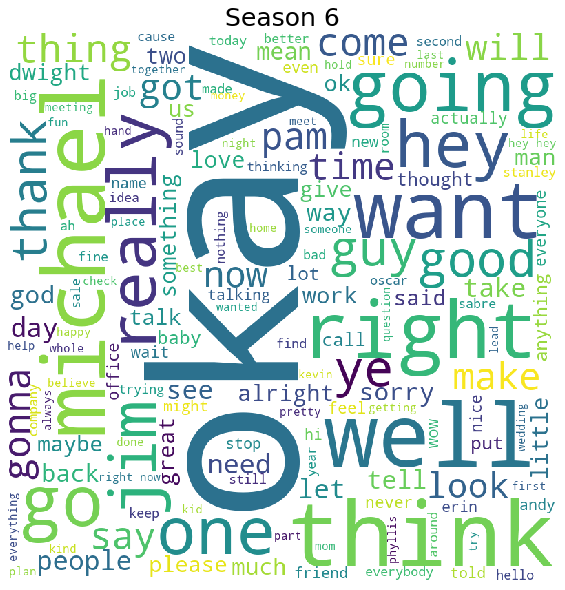

In [142]:
# Create Word Cloud
# www.geeksforgeeks.org/generating-word-cloud-python/

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in s6_lines_breakout['line']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                max_words = 150,
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.title("Season 6", fontsize = 25, color = "black")
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

# Save image
plt.savefig("../images/word_cloud_s6.png")
  
plt.show() 

### Season 7 Word Cloud

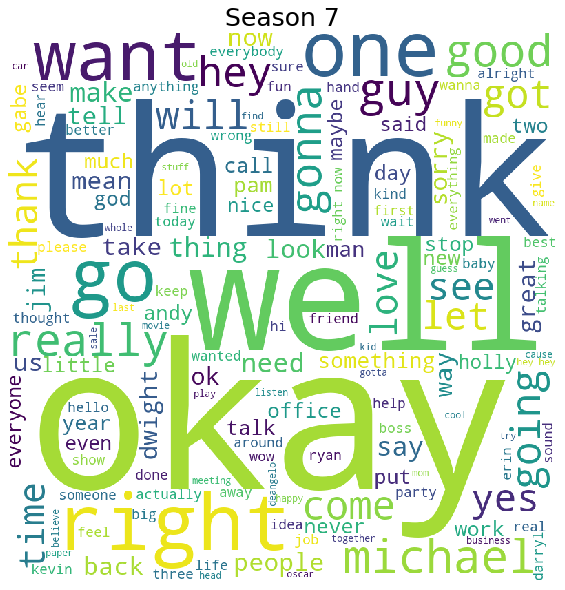

In [143]:
# Create Word Cloud
# www.geeksforgeeks.org/generating-word-cloud-python/

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in s7_lines_breakout['line']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                max_words = 150,
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.title("Season 7", fontsize = 25, color = "black")
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

# Save image
plt.savefig("../images/word_cloud_s7.png")

plt.show() 

### Season 8 Word Cloud

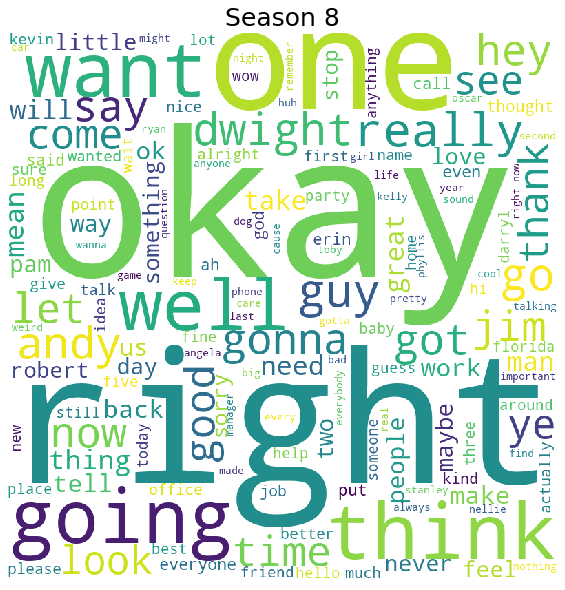

In [144]:
# Create Word Cloud
# www.geeksforgeeks.org/generating-word-cloud-python/

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in s8_lines_breakout['line']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                max_words = 150,
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.title("Season 8", fontsize = 25, color = "black")
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

# Save image
plt.savefig("../images/word_cloud_s8.png")

plt.show() 

### Season 9 Word Cloud

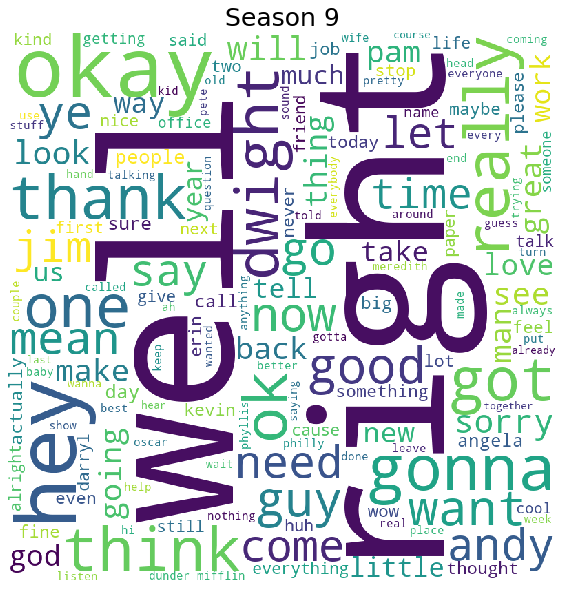

In [145]:
# Create Word Cloud
# www.geeksforgeeks.org/generating-word-cloud-python/

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in s9_lines_breakout['line']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                max_words = 150,
                min_font_size = 10).generate(comment_words) 
  
# Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None)
plt.title("Season 9", fontsize = 25, color = "black")
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

# Save image
plt.savefig("../images/word_cloud_s9.png")

plt.show() 

### Word Clouds: Major Characters

In [146]:
# Break out data by major characters
michael_lines = (lines_df[lines_df['speaker'] == "Michael"]).reset_index(drop=True)
dwight_lines = (lines_df[lines_df['speaker'] == "Dwight"]).reset_index(drop=True)
jim_lines = (lines_df[lines_df['speaker'] == "Jim"]).reset_index(drop=True)
pam_lines = (lines_df[lines_df['speaker'] == "Pam"]).reset_index(drop=True)
andy_lines = (lines_df[lines_df['speaker'] == "Andy"]).reset_index(drop=True)
angela_lines = (lines_df[lines_df['speaker'] == "Angela"]).reset_index(drop=True)
kevin_lines = (lines_df[lines_df['speaker'] == "Kevin"]).reset_index(drop=True)
erin_lines = (lines_df[lines_df['speaker'] == "Erin"]).reset_index(drop=True)
oscar_lines = (lines_df[lines_df['speaker'] == "Oscar"]).reset_index(drop=True)
ryan_lines = (lines_df[lines_df['speaker'] == "Ryan"]).reset_index(drop=True)
darryl_lines = (lines_df[lines_df['speaker'] == "Darryl"]).reset_index(drop=True)
phyllis_lines = (lines_df[lines_df['speaker'] == "Phyllis"]).reset_index(drop=True)
kelly_lines = (lines_df[lines_df['speaker'] == "Kelly"]).reset_index(drop=True)
toby_lines = (lines_df[lines_df['speaker'] == "Toby"]).reset_index(drop=True)
meredith_lines = (lines_df[lines_df['speaker'] == "Meredith"]).reset_index(drop=True)
stanley_lines = (lines_df[lines_df['speaker'] == "Stanley"]).reset_index(drop=True)

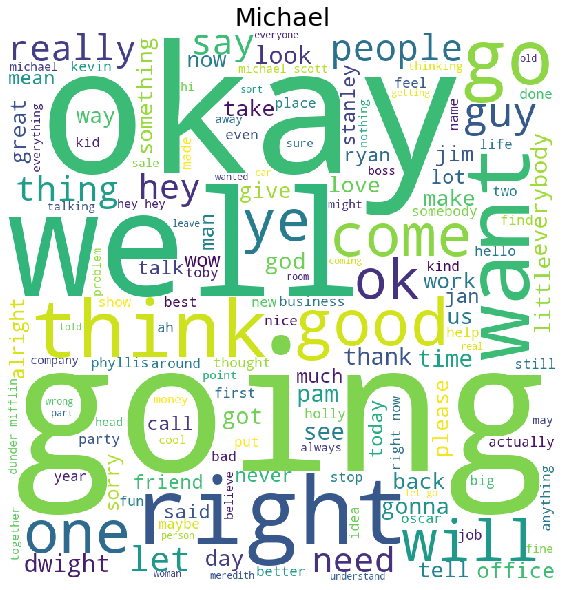

In [147]:
# Create Word Cloud
# www.geeksforgeeks.org/generating-word-cloud-python/

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in michael_lines['line']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                max_words = 150,
                min_font_size = 10).generate(comment_words) 
  
# Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.title("Michael", fontsize = 25, color = "black")
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

# Save image
plt.savefig("../images/word_cloud_michael.png")
  
plt.show() 

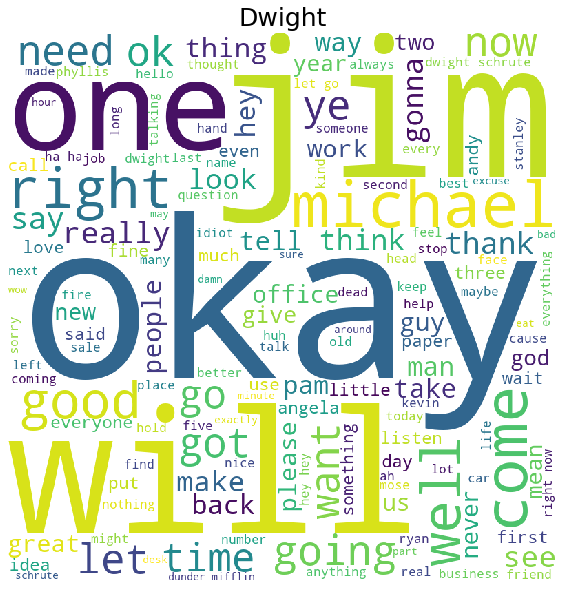

In [148]:
# Create Word Cloud
# www.geeksforgeeks.org/generating-word-cloud-python/

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in dwight_lines['line']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                max_words = 150,
                min_font_size = 10).generate(comment_words) 
  
# Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.title("Dwight", fontsize = 25, color = "black")
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

# Save image
plt.savefig("../images/word_cloud_dwight.png") 
  
plt.show() 

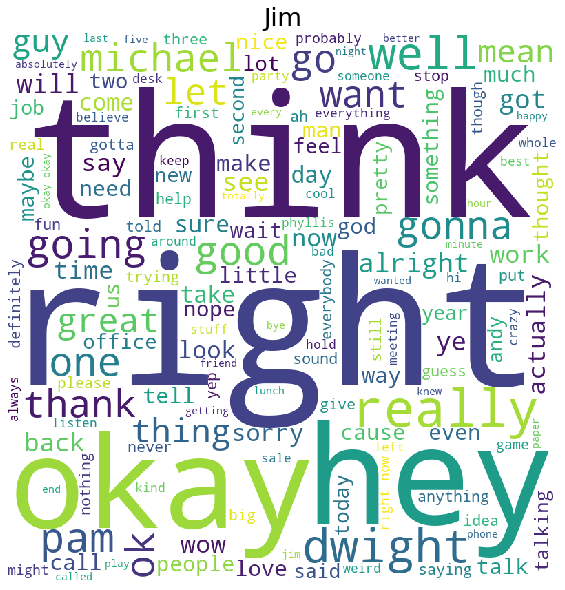

In [149]:
# Create Word Cloud
# www.geeksforgeeks.org/generating-word-cloud-python/

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in jim_lines['line']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                max_words = 150,
                min_font_size = 10).generate(comment_words) 
  
# Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.title("Jim", fontsize = 25, color = "black")
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

# Save image
plt.savefig("../images/word_cloud_jim.png")
  
plt.show() 

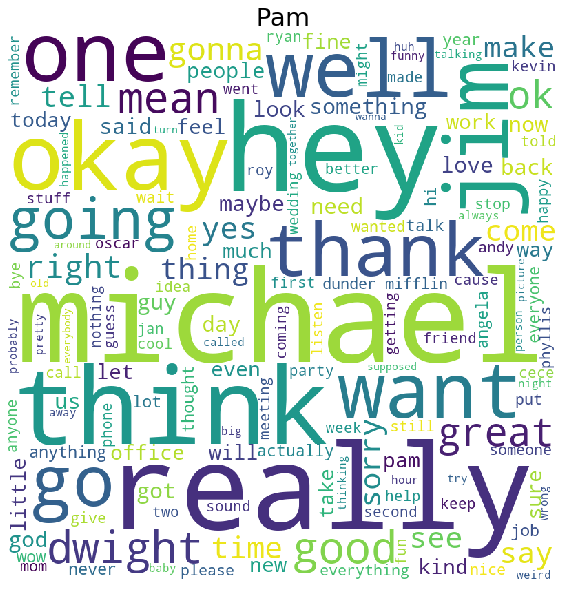

In [150]:
# Create Word Cloud
# www.geeksforgeeks.org/generating-word-cloud-python/

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in pam_lines['line']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                max_words = 150,
                min_font_size = 10).generate(comment_words) 
  
# Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.title("Pam", fontsize = 25, color = "black")
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

# Save image
plt.savefig("../images/word_cloud_pam.png")
  
plt.show() 

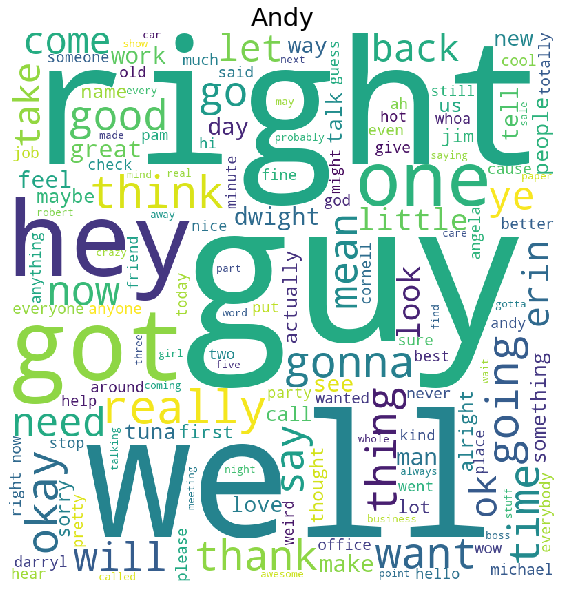

In [151]:
# Create Word Cloud
# www.geeksforgeeks.org/generating-word-cloud-python/

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in andy_lines['line']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                max_words = 150,
                min_font_size = 10).generate(comment_words) 
  
# Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.title("Andy", fontsize = 25, color = "black")
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

# Save image
plt.savefig("../images/word_cloud_andy.png")
  
plt.show() 

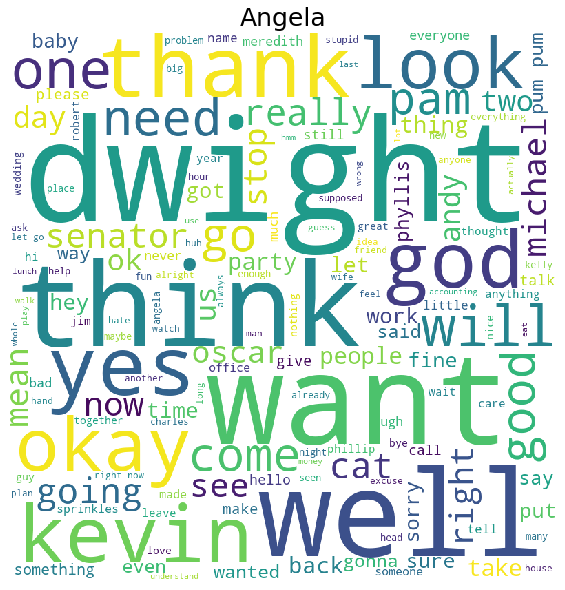

In [152]:
# Create Word Cloud
# www.geeksforgeeks.org/generating-word-cloud-python/

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in angela_lines['line']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                max_words = 150,
                min_font_size = 10).generate(comment_words) 
  
# Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.title("Angela", fontsize = 25, color = "black")
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

# Save image
plt.savefig("../images/word_cloud_angela.png")
  
plt.show() 

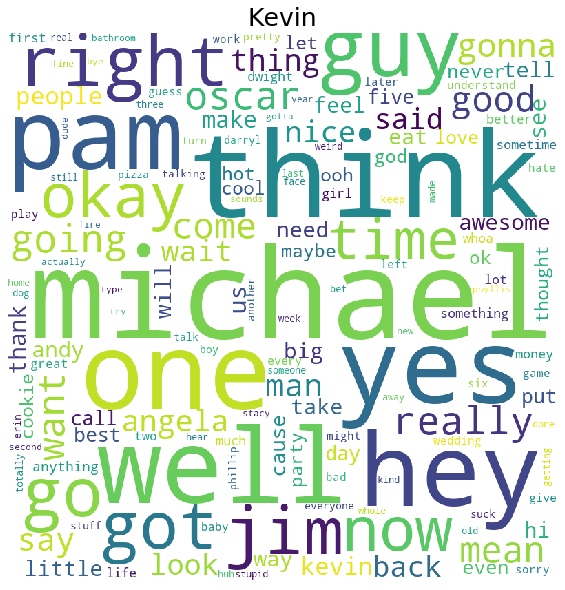

In [153]:
# Create Word Cloud
# www.geeksforgeeks.org/generating-word-cloud-python/

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in kevin_lines['line']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                max_words = 150,
                min_font_size = 10).generate(comment_words) 
  
# Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.title("Kevin", fontsize = 25, color = "black")
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

# Save image
plt.savefig("../images/word_cloud_kevin.png")
  
plt.show() 

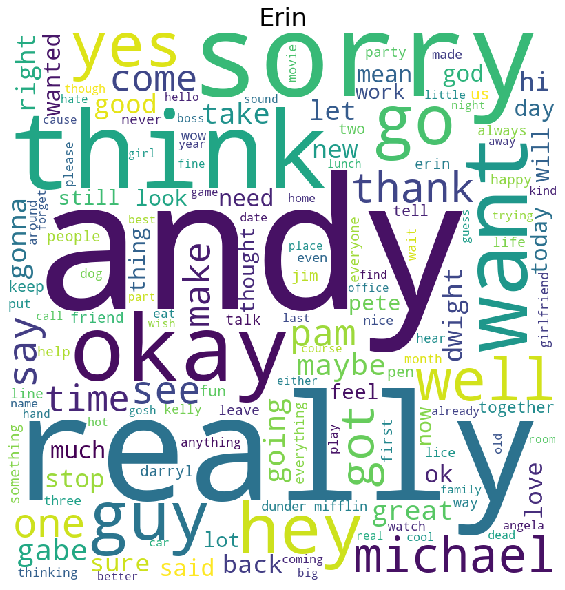

In [154]:
# Create Word Cloud
# www.geeksforgeeks.org/generating-word-cloud-python/

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in erin_lines['line']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                max_words = 150,
                min_font_size = 10).generate(comment_words) 
  
# Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.title("Erin", fontsize = 25, color = "black")
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

# Save image
plt.savefig("../images/word_cloud_erin.png")
  
plt.show() 

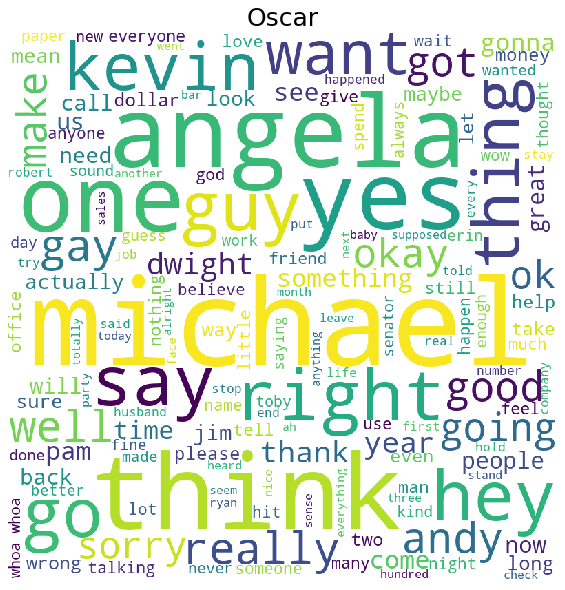

In [155]:
# Create Word Cloud
# www.geeksforgeeks.org/generating-word-cloud-python/

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in oscar_lines['line']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                max_words = 150,
                min_font_size = 10).generate(comment_words) 
  
# Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.title("Oscar", fontsize = 25, color = "black")
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

# Save image
plt.savefig("../images/word_cloud_oscar.png")
plt.show() 

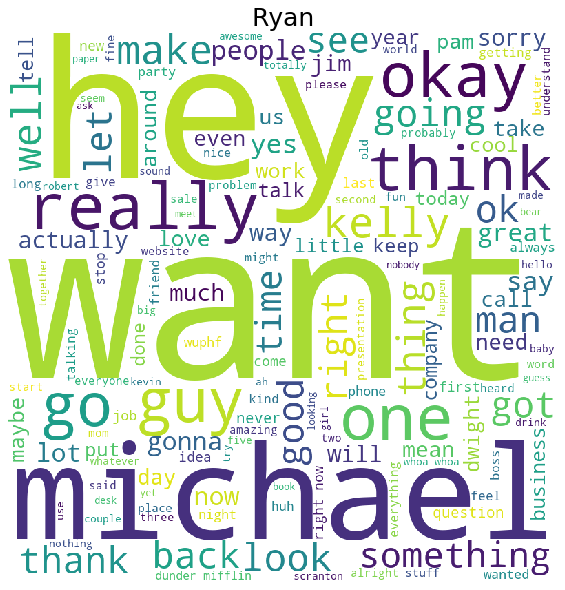

In [156]:
# Create Word Cloud
# www.geeksforgeeks.org/generating-word-cloud-python/

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in ryan_lines['line']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                max_words = 150,
                min_font_size = 10).generate(comment_words) 
  
# Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.title("Ryan", fontsize = 25, color = "black")
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

# Save image
plt.savefig("../images/word_cloud_ryan.png")
  
plt.show() 

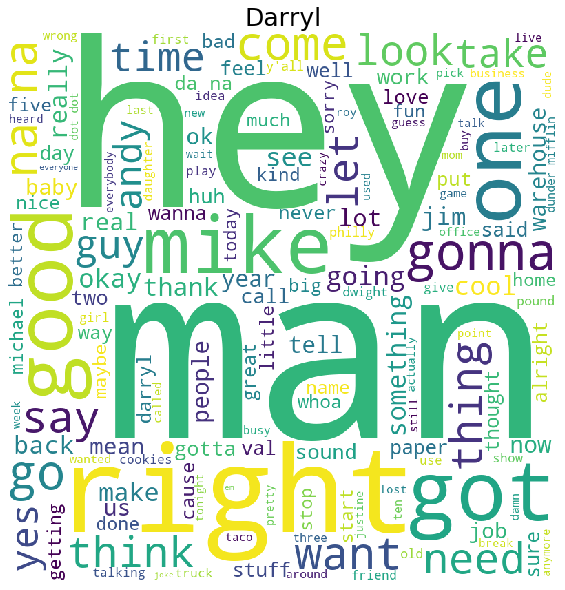

In [157]:
# Create Word Cloud
# www.geeksforgeeks.org/generating-word-cloud-python/

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in darryl_lines['line']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                max_words = 150,
                min_font_size = 10).generate(comment_words) 
  
# Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.title("Darryl", fontsize = 25, color = "black")
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

# Save image
plt.savefig("../images/word_cloud_darryl.png")
  
plt.show() 

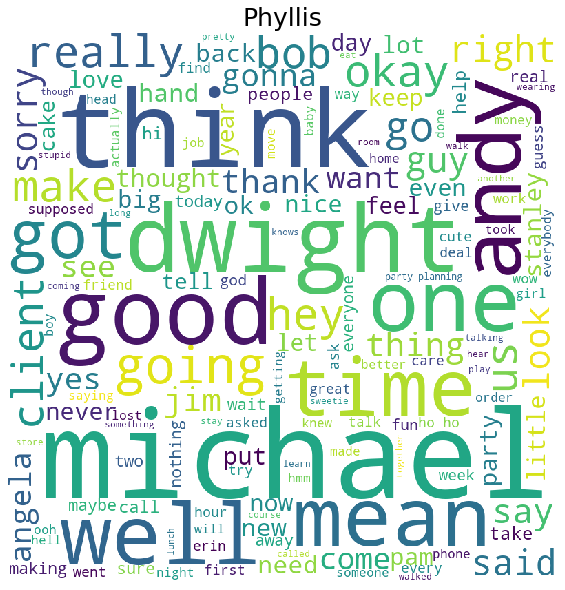

In [158]:
# Create Word Cloud
# www.geeksforgeeks.org/generating-word-cloud-python/

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in phyllis_lines['line']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                max_words = 150,
                min_font_size = 10).generate(comment_words) 
  
# Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.title("Phyllis", fontsize = 25, color = "black")
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

# Save image
plt.savefig("../images/word_cloud_phyllis.png")
  
plt.show() 

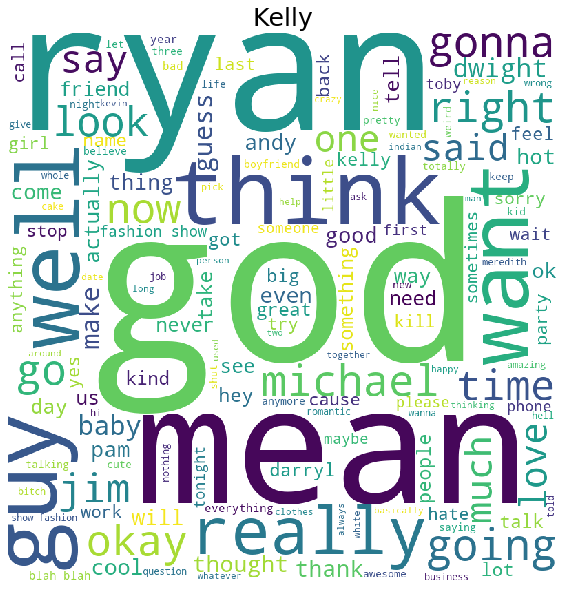

In [159]:
# Create Word Cloud
# www.geeksforgeeks.org/generating-word-cloud-python/

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in kelly_lines['line']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                max_words = 150,
                min_font_size = 10).generate(comment_words) 
  
# Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.title("Kelly", fontsize = 25, color = "black")
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

# Save image
plt.savefig("../images/word_cloud_kelly.png")
  
plt.show() 

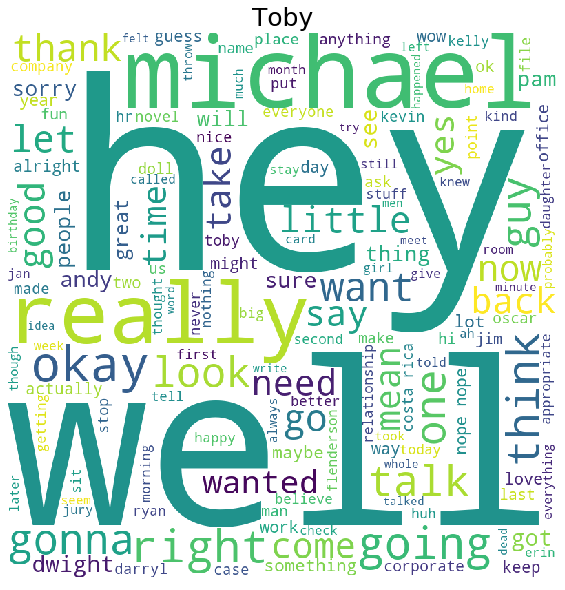

In [160]:
# Create Word Cloud
# www.geeksforgeeks.org/generating-word-cloud-python/

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in toby_lines['line']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                max_words = 150,
                min_font_size = 10).generate(comment_words) 
  
# Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.title("Toby", fontsize = 25, color = "black")
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

# Save image
plt.savefig("../images/word_cloud_toby.png")
  
plt.show() 

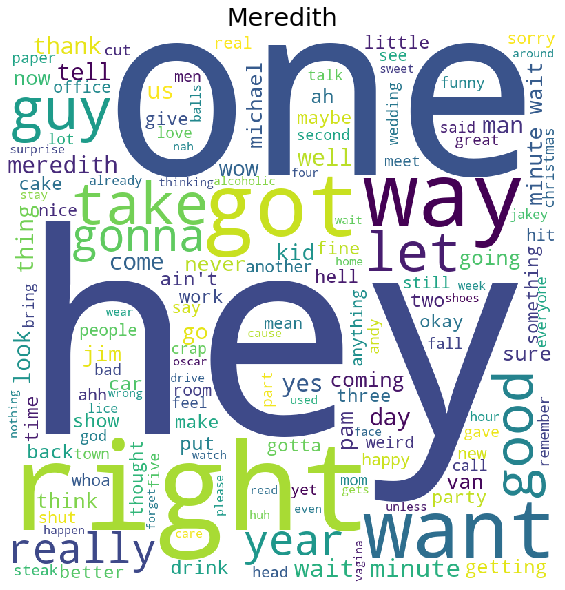

In [161]:
# Create Word Cloud
# www.geeksforgeeks.org/generating-word-cloud-python/

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in meredith_lines['line']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                max_words = 150,
                min_font_size = 10).generate(comment_words) 
  
# Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.title("Meredith", fontsize = 25, color = "black")
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

# Save image
plt.savefig("../images/word_cloud_meredith.png")
  
plt.show() 

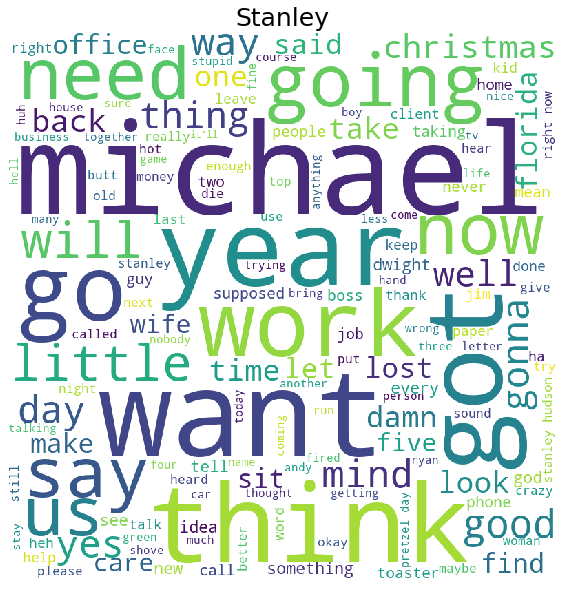

In [162]:
# Create Word Cloud
# www.geeksforgeeks.org/generating-word-cloud-python/

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in stanley_lines['line']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                max_words = 150,
                min_font_size = 10).generate(comment_words) 
  
# Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.title("Stanley", fontsize = 25, color = "black")
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

# Save image
plt.savefig("../images/word_cloud_stanley.png")
  
plt.show() 

### Lines by Major Character